In [36]:
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data

In [37]:
df = pd.read_csv('combine_methods_detail.csv')
df_tweets_stats = df.copy()
df_tweets_stats.loc[df_tweets_stats['party'] == 'AFD', 'party'] = 'AfD'

df_tweets_stats = df_tweets_stats.drop(['word from wordlist', 'match', 'original tweet', 'tweet'], axis='columns')
df_tweets_stats['created at']=pd.to_datetime(df_tweets_stats['created at'], utc= True)
parties = df_tweets_stats['party'].unique()

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

# Number of Covid Tweets per Party

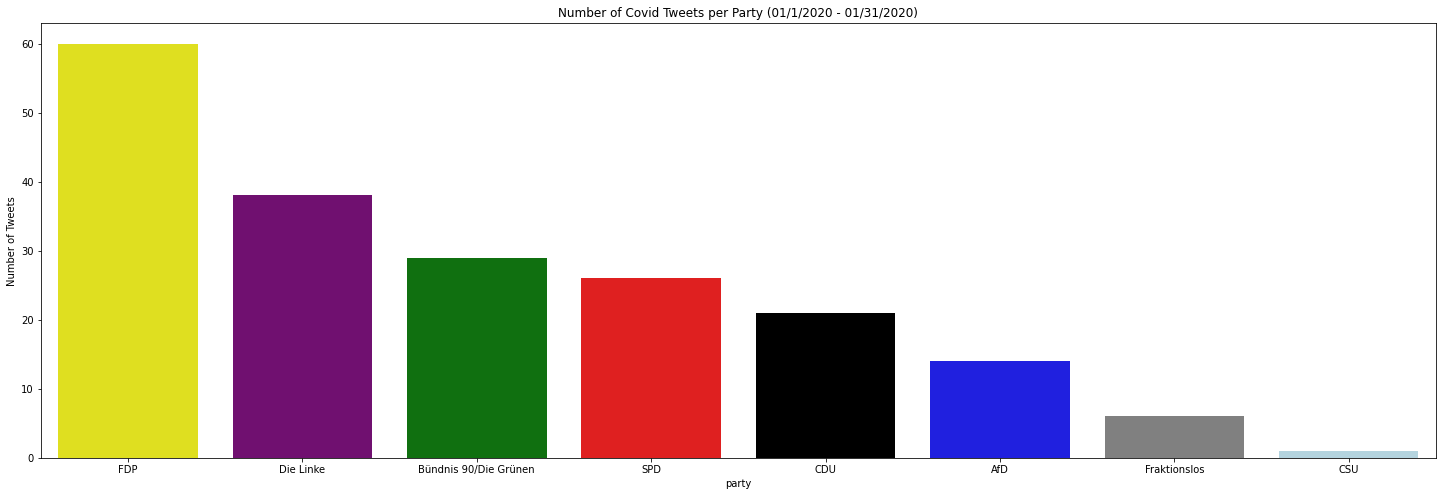

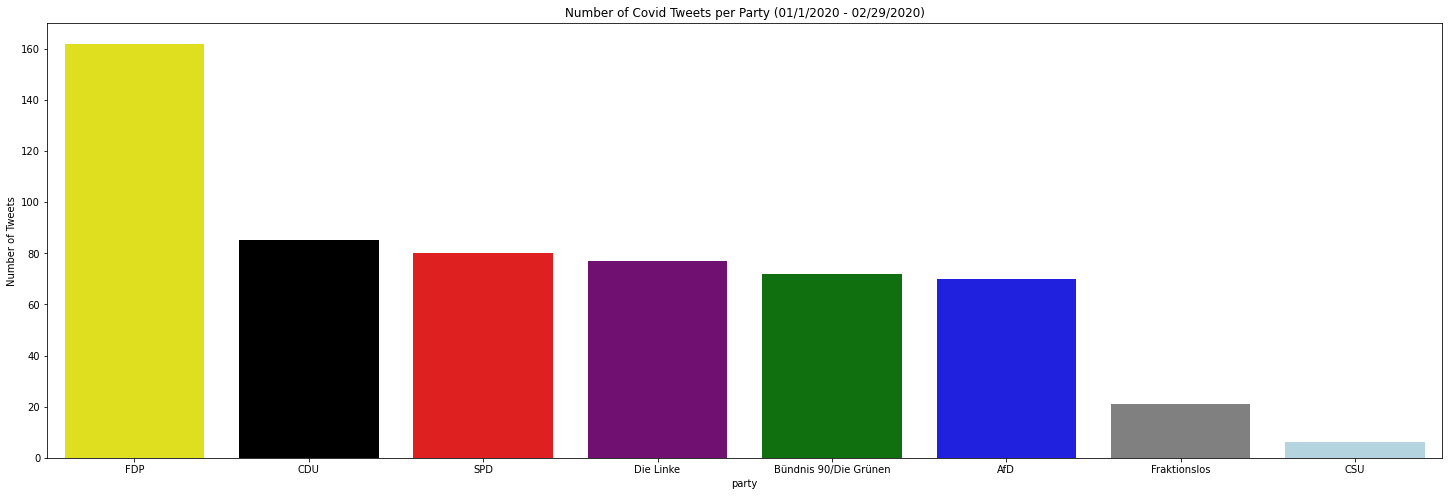

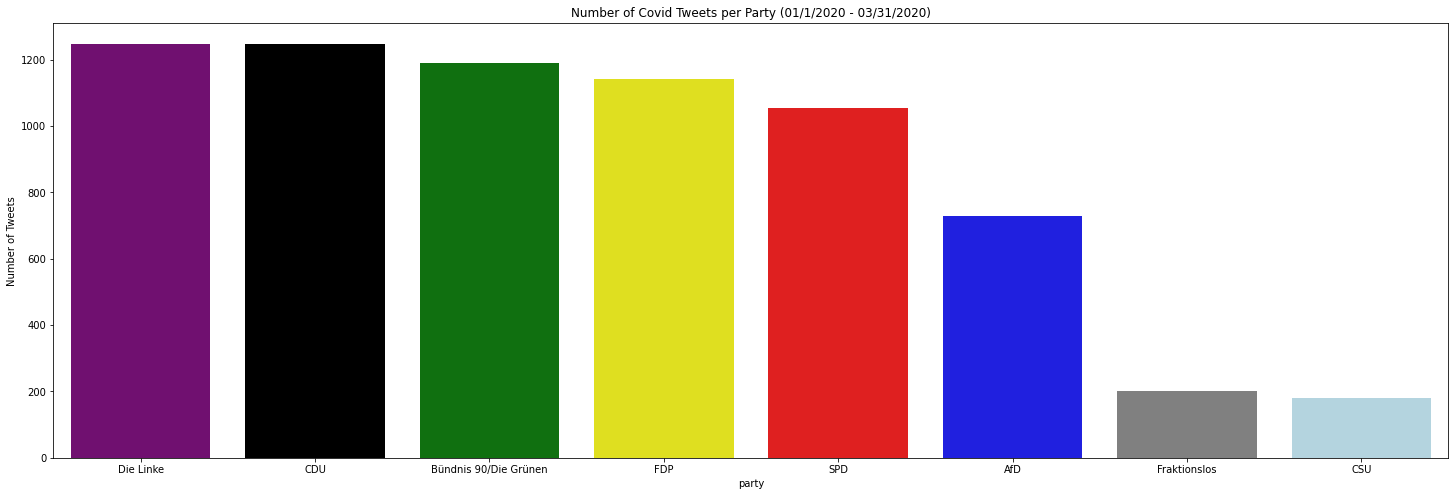

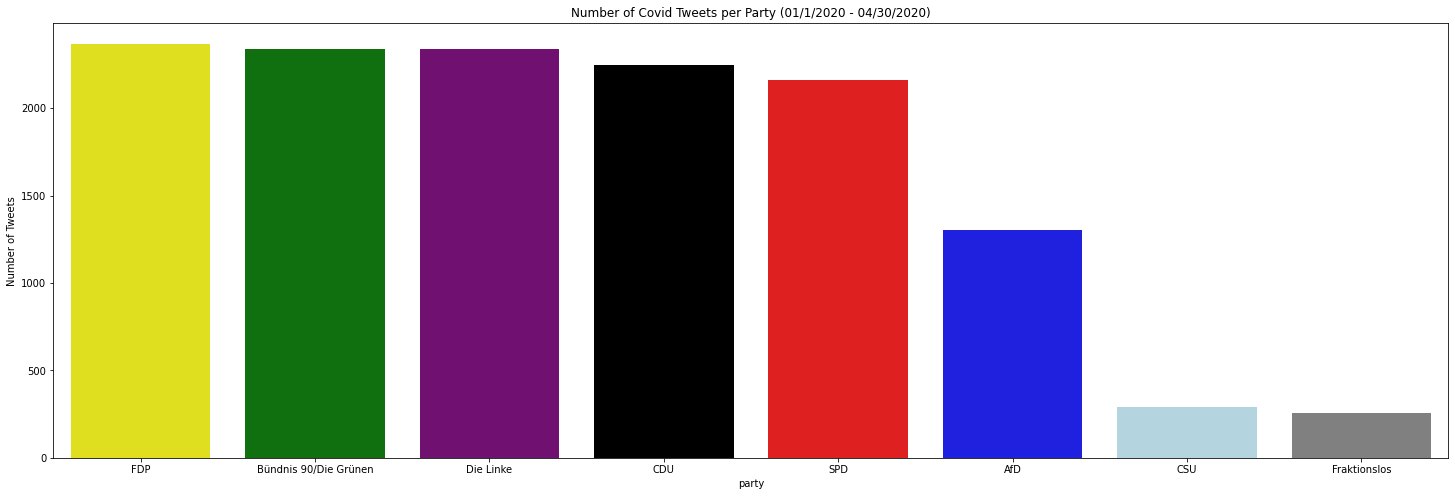

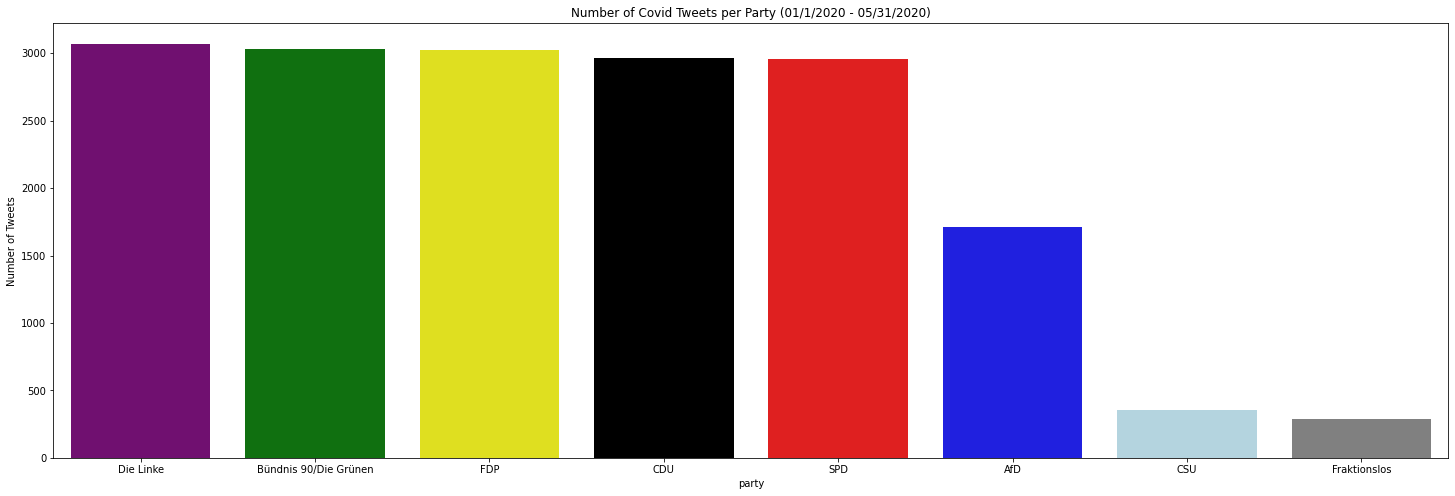

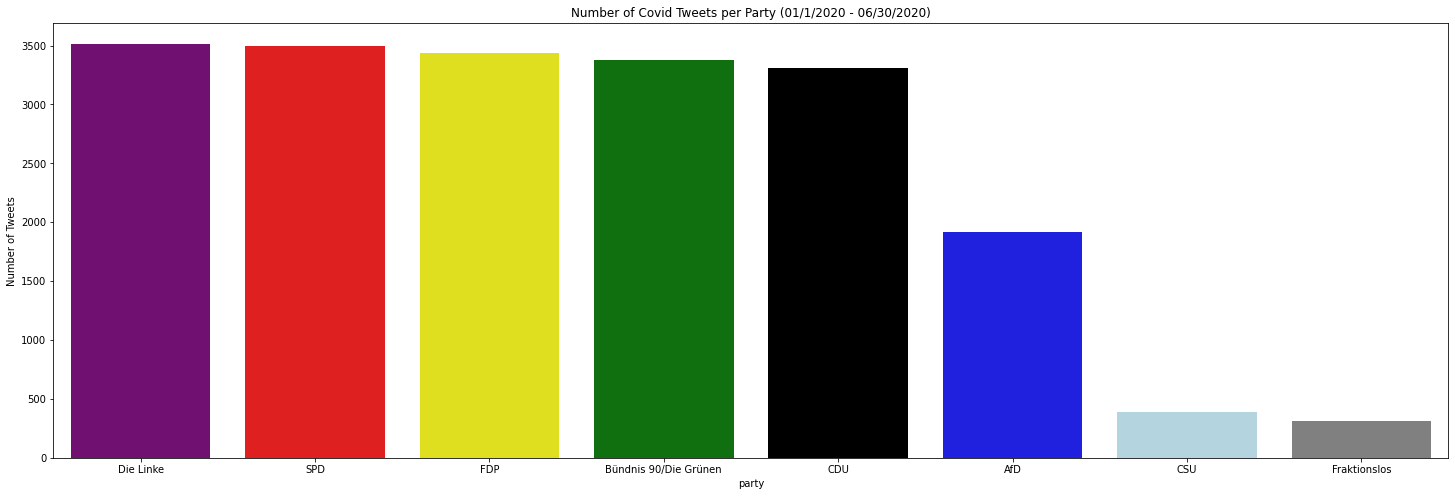

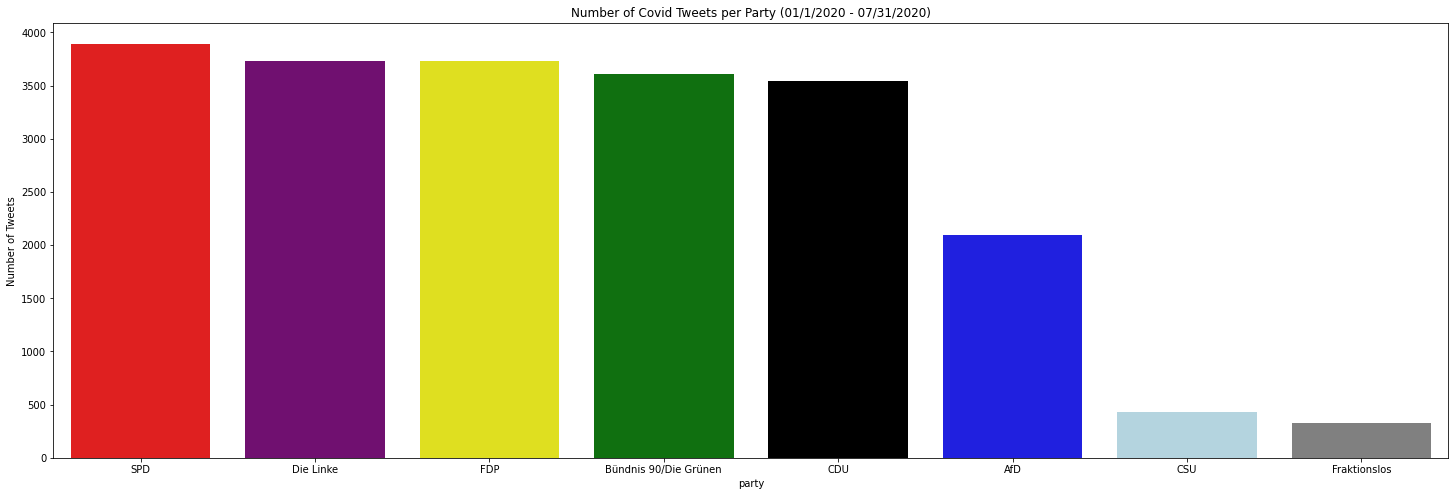

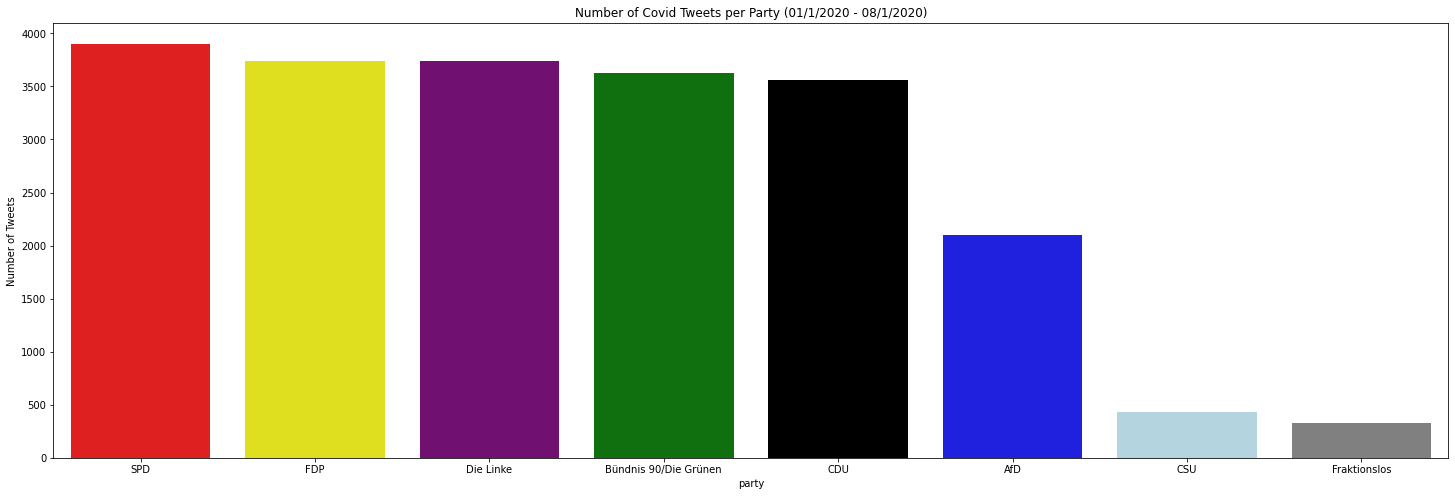

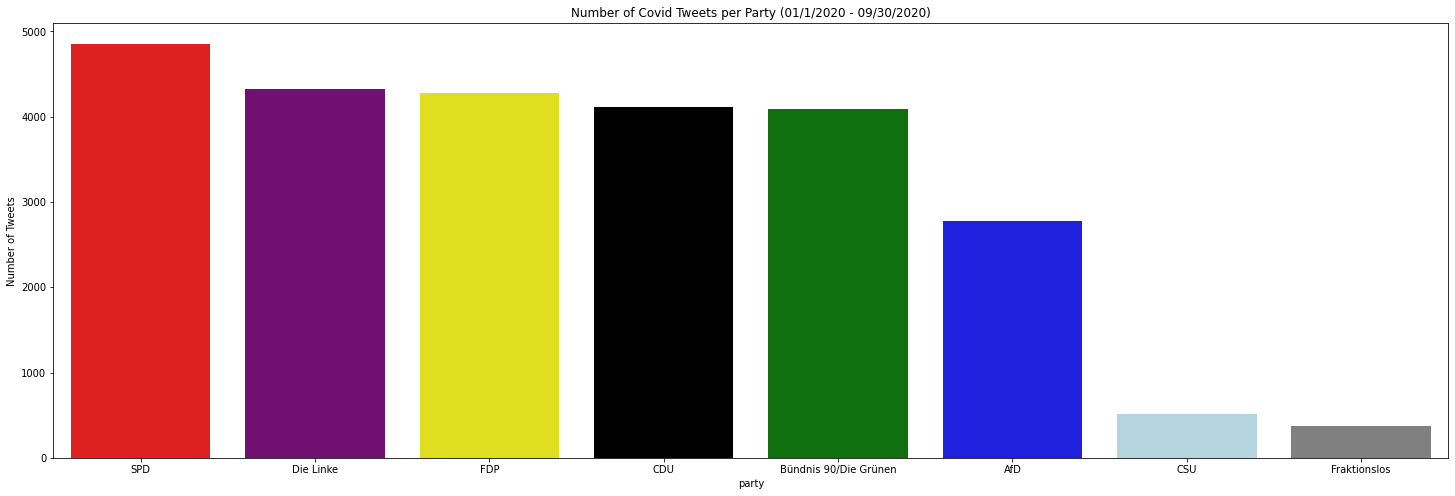

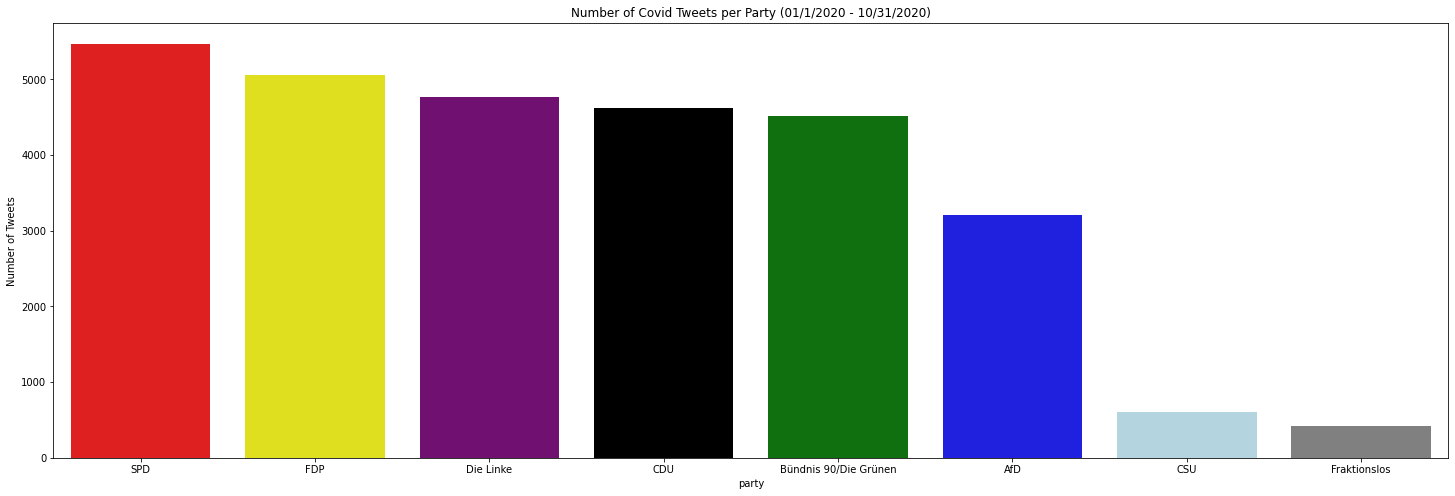

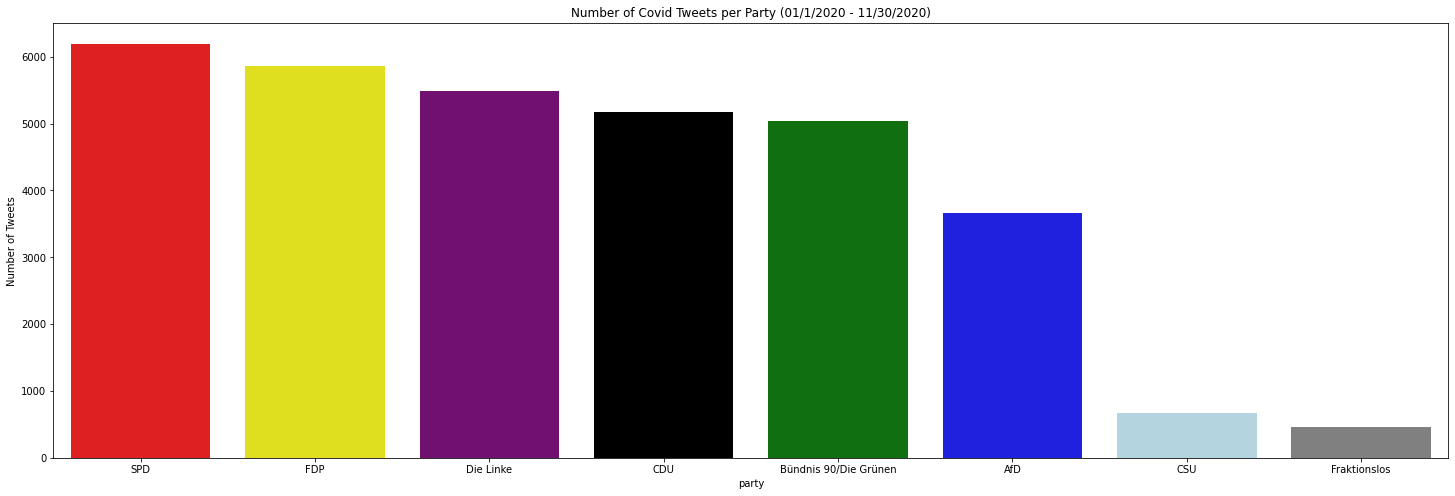

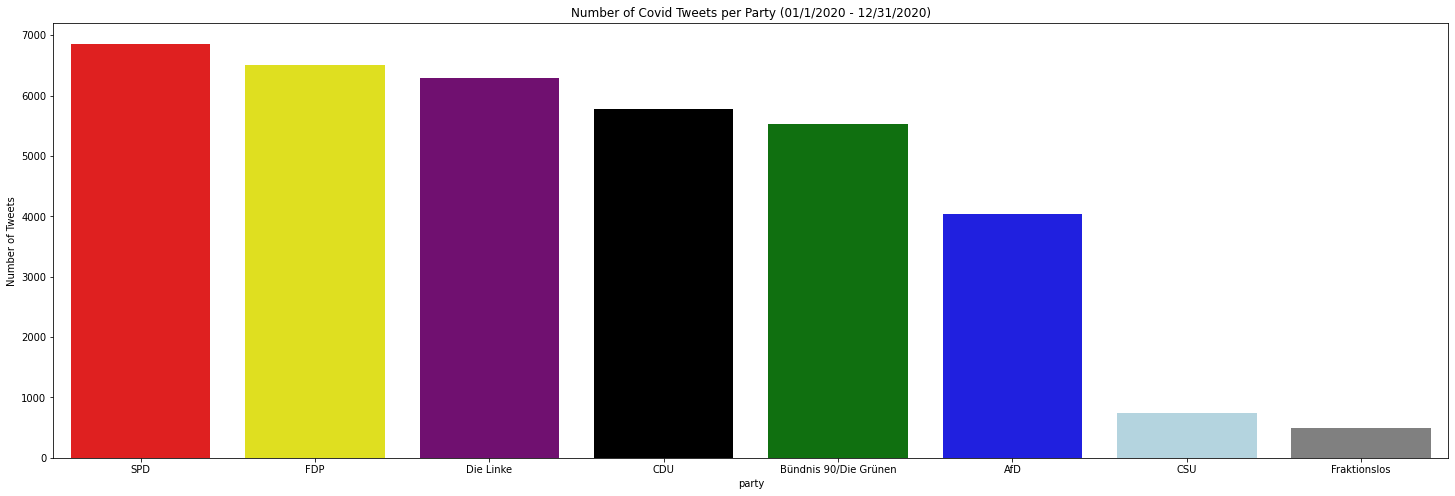

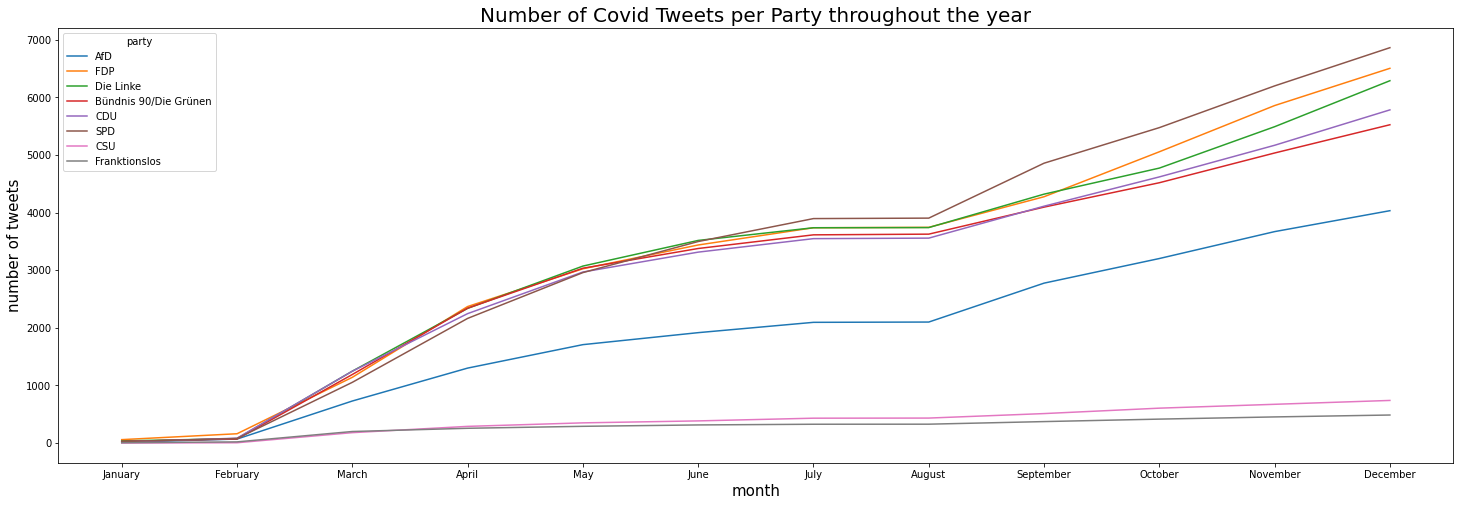

In [38]:


data =[]

year = { 'January': '01/31/2020',
         'February': '02/29/2020',
         'March': '03/31/2020',
         'April': '04/30/2020',
         'May': '05/31/2020',
         'June': '06/30/2020',
         'July': '07/31/2020',
         'August': '08/1/2020',
         'September': '09/30/2020',
         'October': '10/31/2020',
         'November': '11/30/2020',
         'December': '12/31/2020',
         }

df_tweets_stats_month = df_tweets_stats.copy()

for key, value in year.items():
    start_date = pd.to_datetime('01/1/2020', utc= True)
    end_date = pd.to_datetime(value, utc= True)
    df_tweets_per_month = df_tweets_stats_month.loc[(df_tweets_stats_month['created at'] >= start_date) & (df_tweets_stats_month['created at'] <= end_date)]
    df_tweets_per_month.reset_index(inplace=True)
    fig = plt.subplots(figsize=(25,8))
    chart = sns.countplot(data=df_tweets_per_month,
                          x='party',
                          order=df_tweets_per_month['party'].value_counts().index,
                          palette=party_colors)
    chart.set(ylabel='Number of Tweets',
              title=f'Number of Covid Tweets per Party (01/1/2020 - {value})')
    plt.show()

    df_tweets_per_party = df_tweets_per_month['party'].value_counts()
    data.append(['AfD', df_tweets_per_party.AfD, key])
    data.append(['FDP', df_tweets_per_party.FDP, key])
    data.append(['Die Linke', df_tweets_per_party['Die Linke'], key])
    data.append(['Bündnis 90/Die Grünen', df_tweets_per_party['Bündnis 90/Die Grünen'], key])
    data.append(['CDU', df_tweets_per_party.CDU, key])
    data.append(['SPD', df_tweets_per_party.SPD, key])
    data.append(['CSU', df_tweets_per_party.CSU, key])
    data.append(['Franktionslos', df_tweets_per_party.Fraktionslos, key])


df_tweets_per_month = pd.DataFrame(data, columns=['party', 'total_tweets', 'month'])
df_tweets_per_month.reset_index(inplace=True)
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='month', y='total_tweets', data=df_tweets_per_month, hue='party')
plt.title("Number of Covid Tweets per Party throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

# Number of Covid Tweets per Party

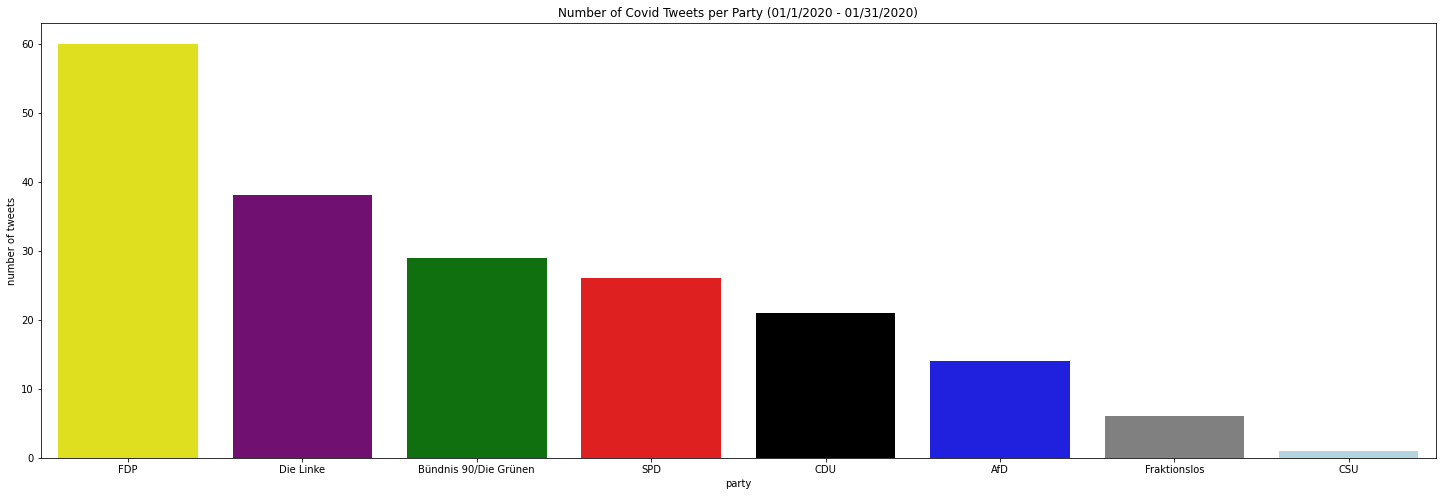

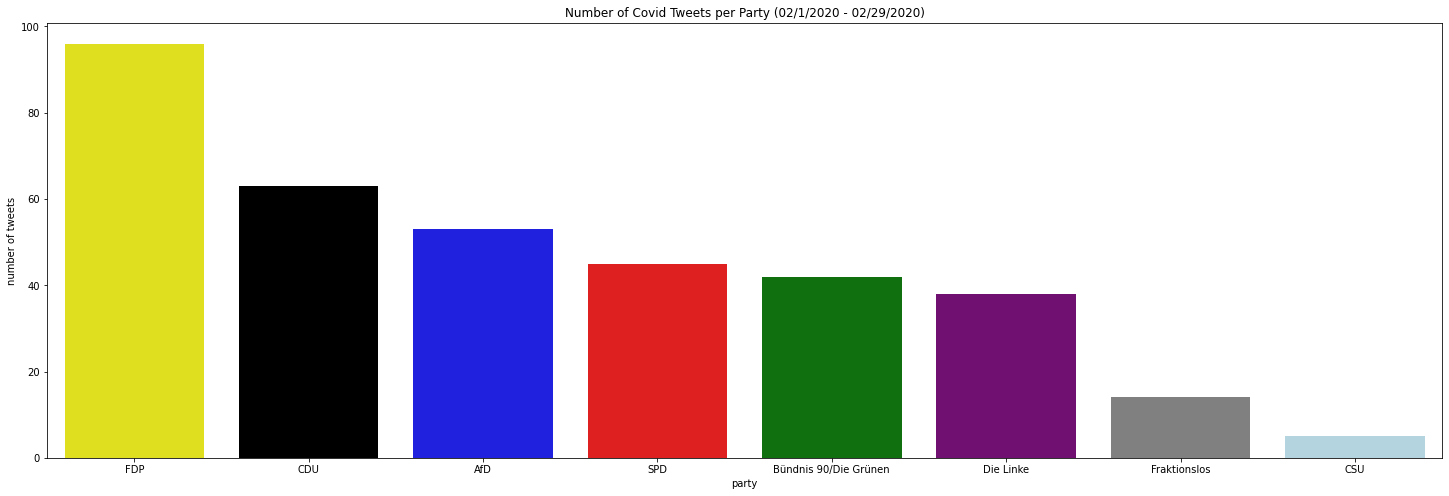

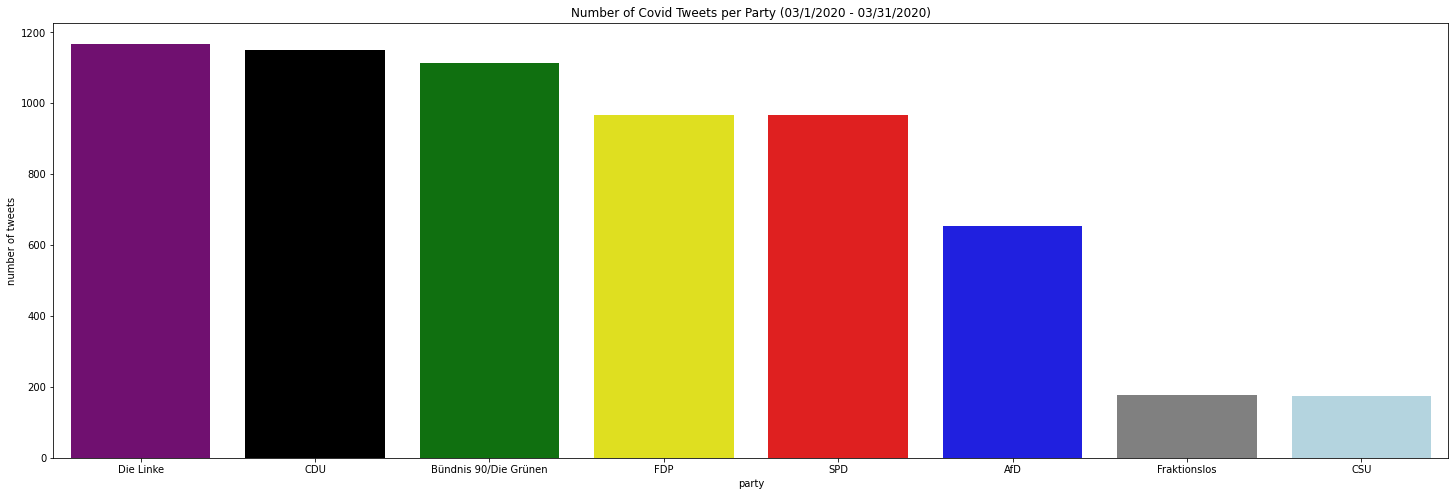

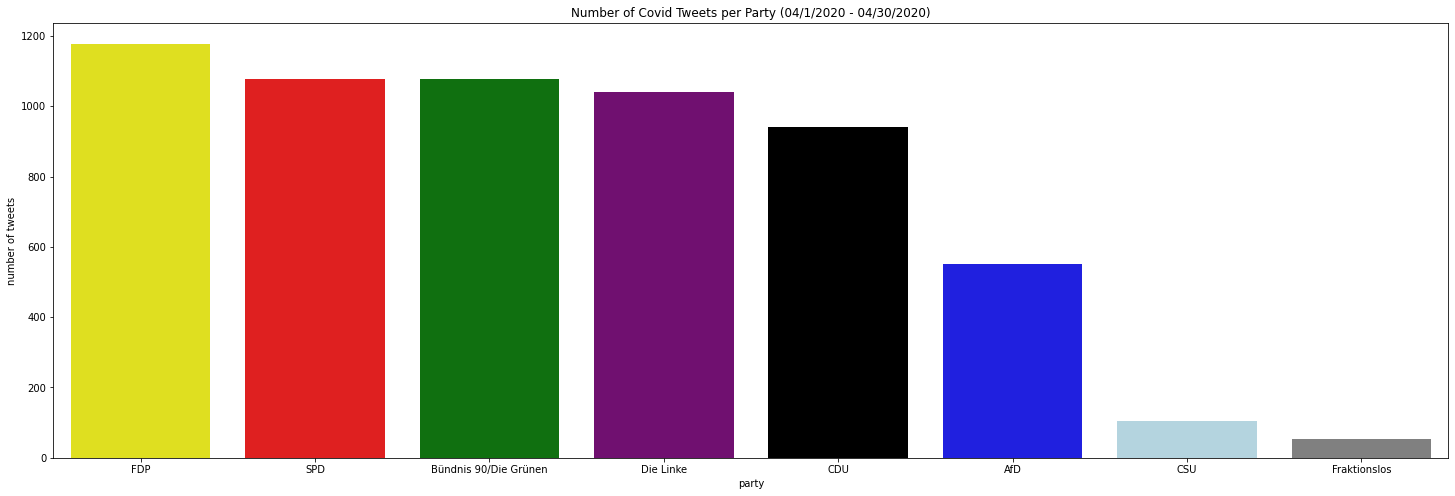

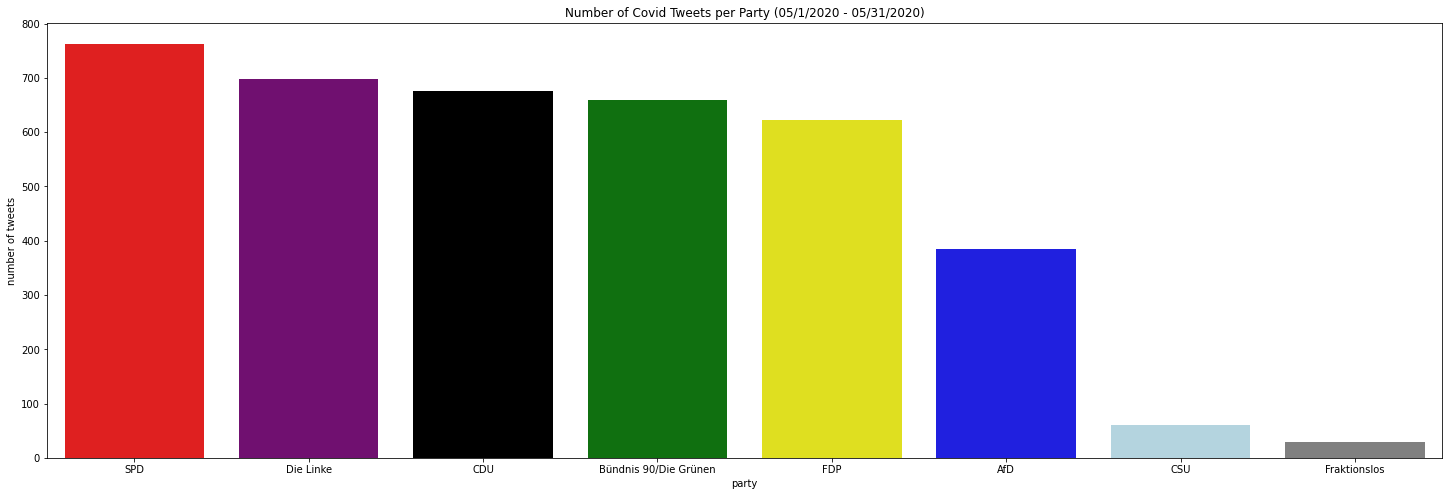

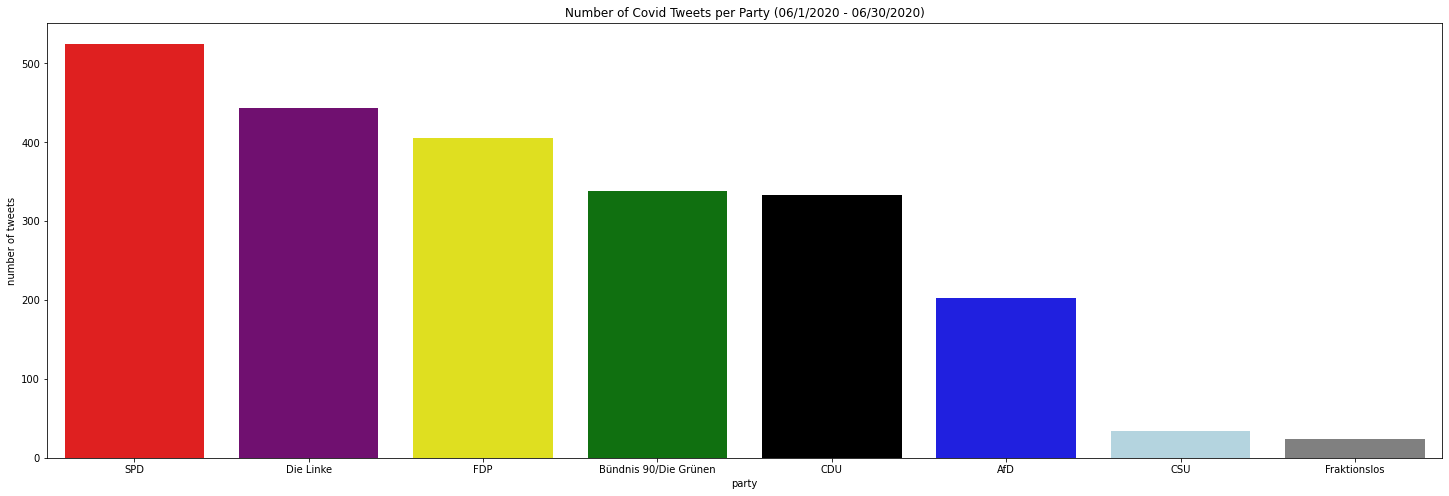

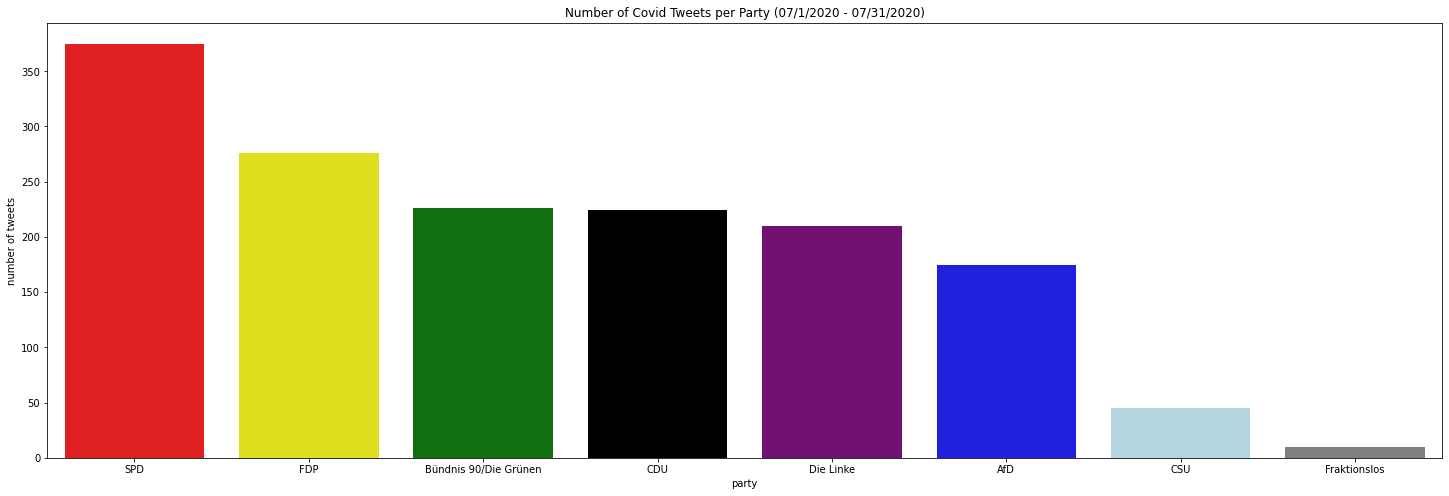

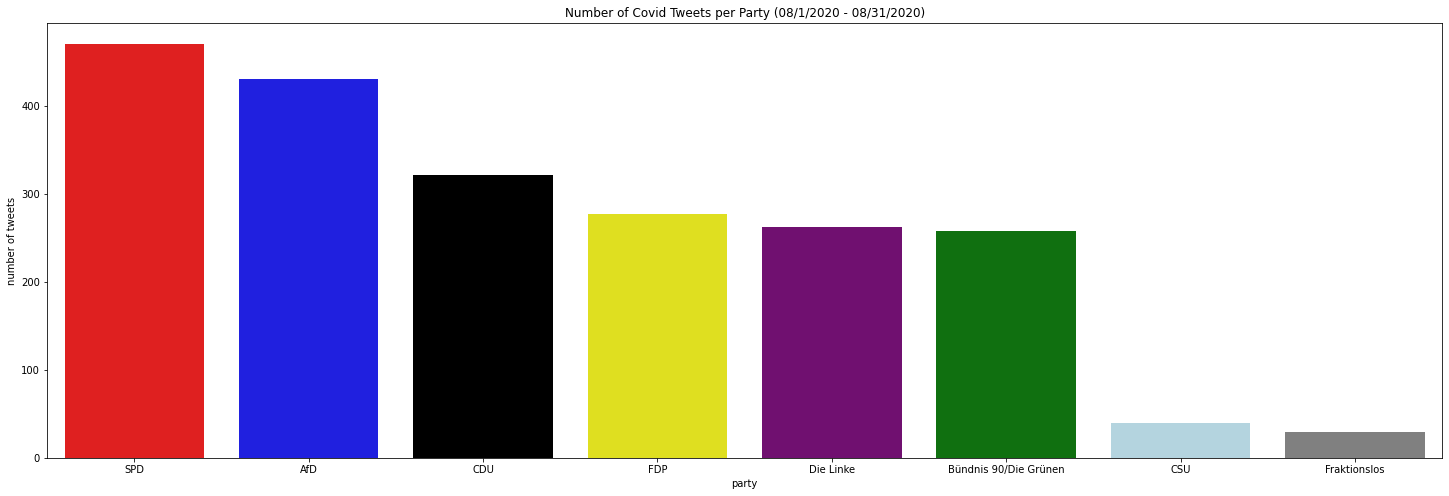

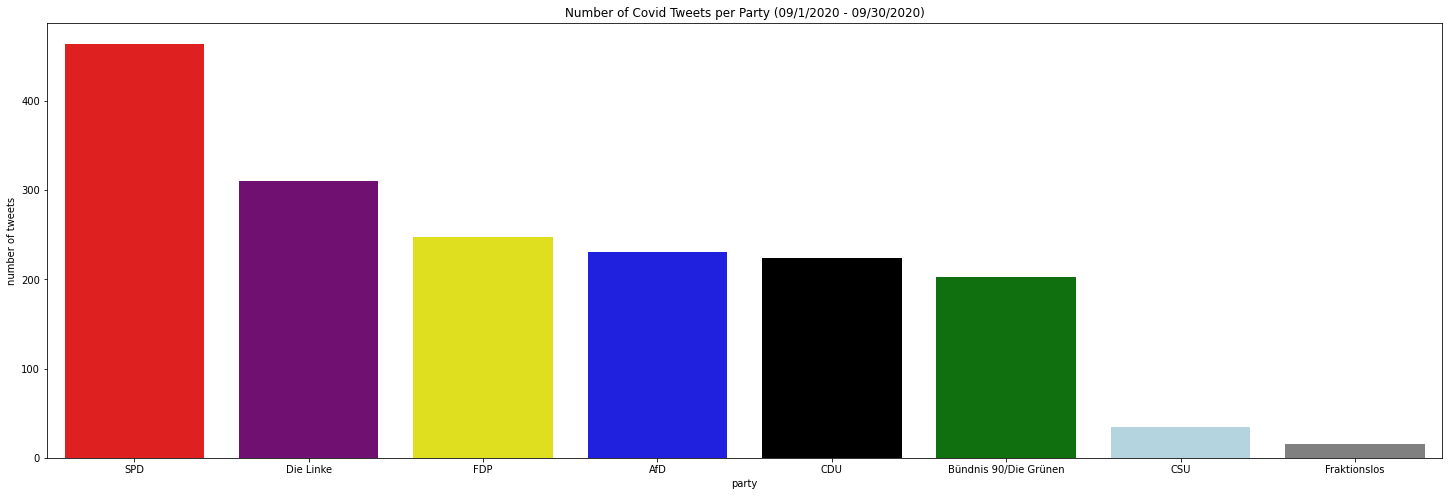

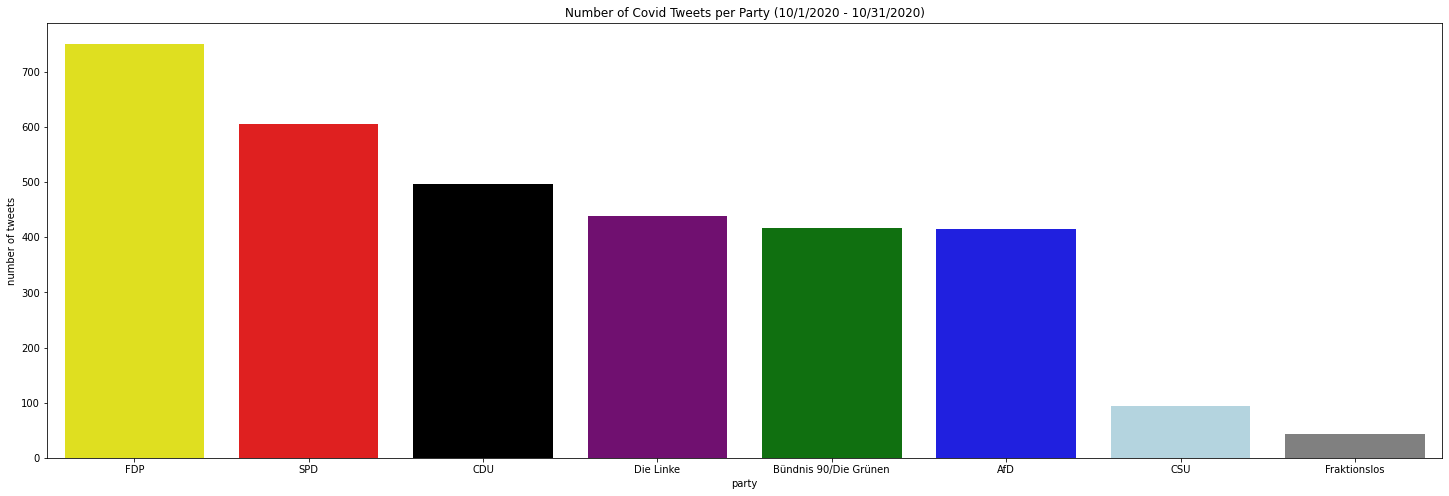

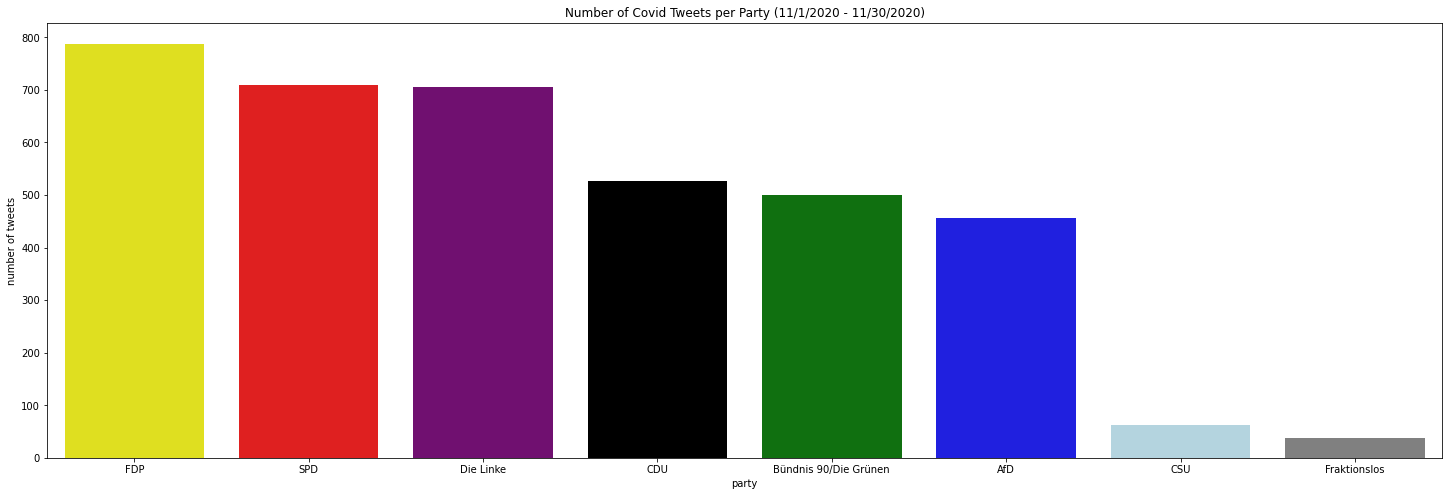

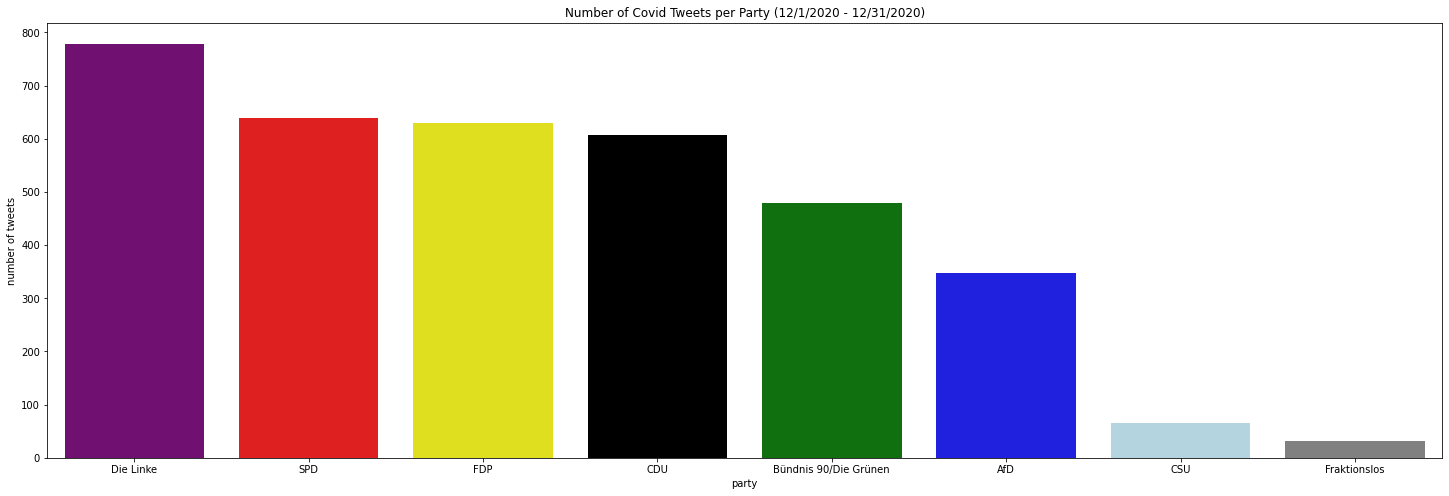

In [39]:
start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]

df_tweets_stats_per_month = df_tweets_stats.copy()
for i in start_end_date:
    start_date = pd.to_datetime(i[0], utc= True)
    end_date = pd.to_datetime(i[1], utc= True)
    df_tweets_stats_per_month1 = df_tweets_stats_per_month.loc[(df_tweets_stats_per_month['created at'] >= start_date) & (df_tweets_stats_per_month['created at'] <= end_date)]
    df_tweets_stats_per_month1.reset_index(inplace=True)
    fig = plt.subplots(figsize=(25,8))
    chart = sns.countplot(data=df_tweets_stats_per_month1,
                          x='party',
                          order=df_tweets_stats_per_month1['party'].value_counts().index,
                          palette=party_colors)
    chart.set(ylabel='number of tweets',
              title=f'Number of Covid Tweets per Party ({i[0]} - {i[1]})')


# Number of Covid Tweets throughout the year

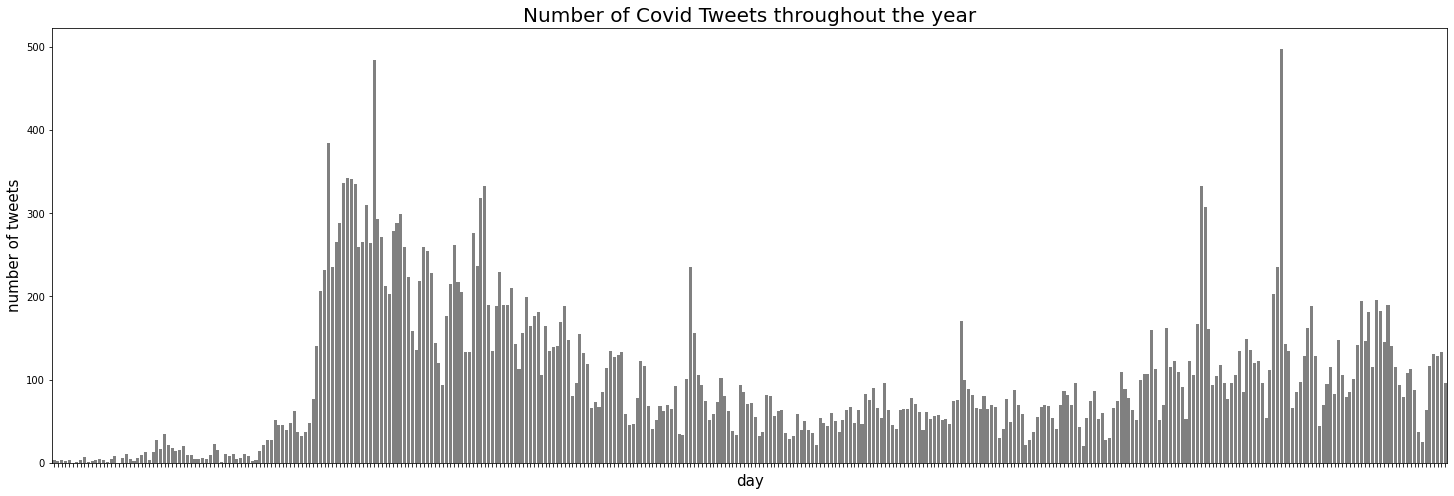

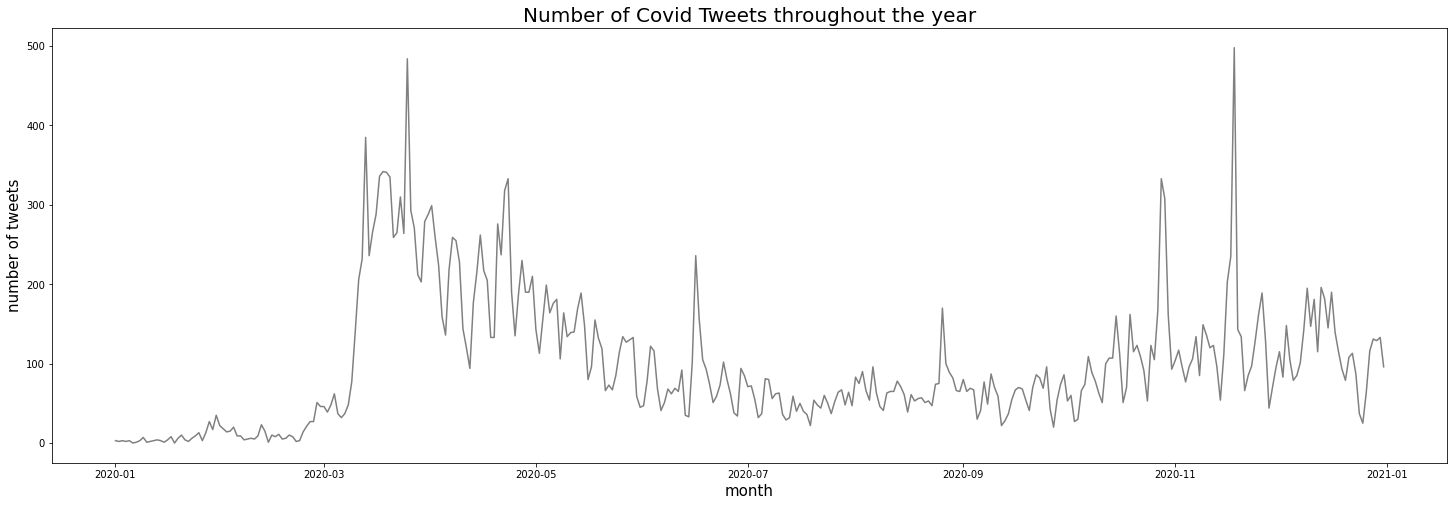

           date  tweets
0    2020-01-01       3
1    2020-01-02       5
2    2020-01-03       8
3    2020-01-04      10
4    2020-01-05      13
..          ...     ...
361  2020-12-27   35819
362  2020-12-28   35950
363  2020-12-29   36079
364  2020-12-30   36212
365  2020-12-31   36308

[366 rows x 2 columns]


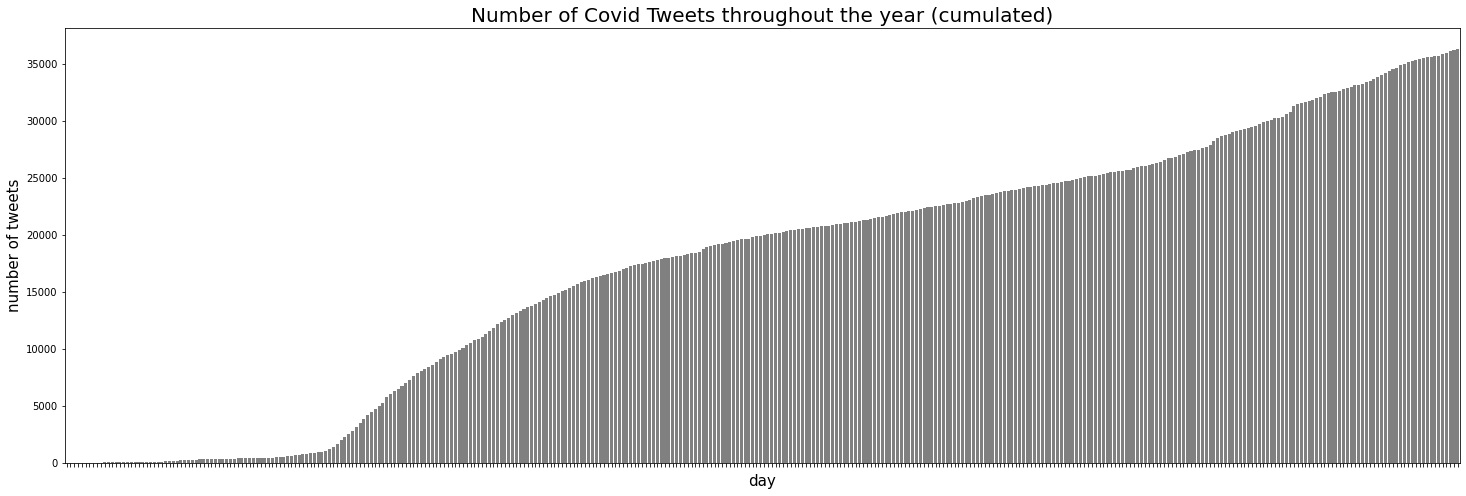

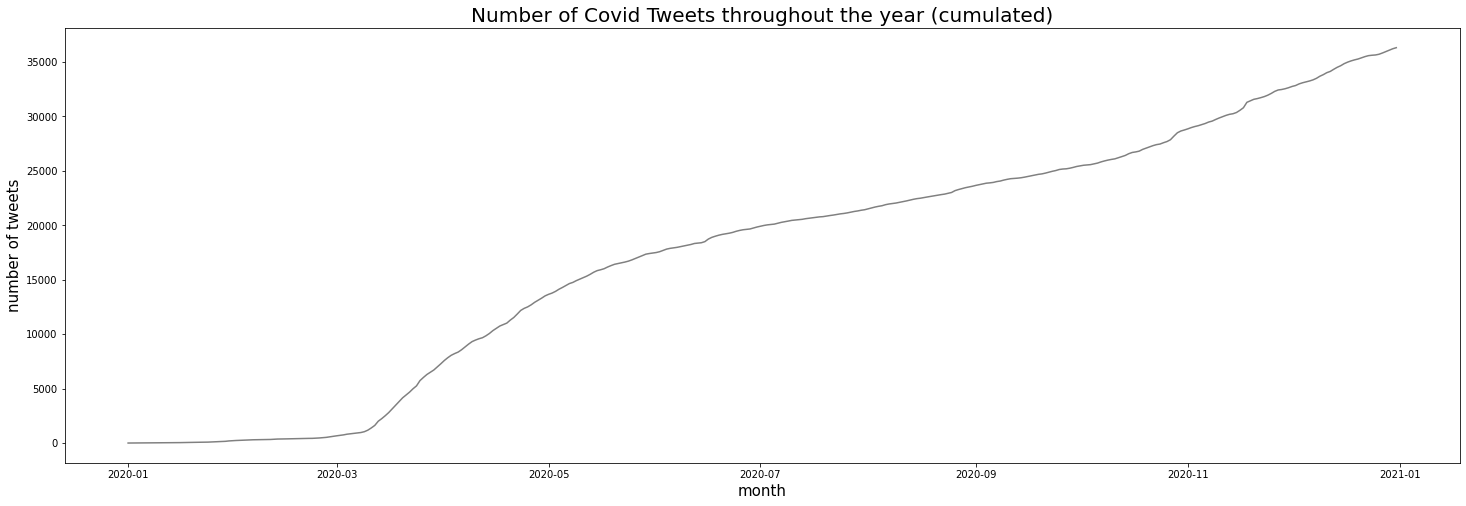

In [53]:
df_tweets_stats_year = df_tweets_stats.copy()
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)
df_tweets_stats_year['created at']=pd.to_datetime(df_tweets_stats_year['created at'], utc= True).dt.date
df_tweets_stats_year = df_tweets_stats_year.loc[(df_tweets_stats_year['created at'] >= start_date) & (df_tweets_stats_year['created at'] <= end_date)]

df_tweets_stats_year = df_tweets_stats_year.pivot_table(index=['created at'], aggfunc='size')
df_tweets_stats_year = df_tweets_stats_year.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
df_tweets_stats_year = pd.DataFrame({'date':df_tweets_stats_year.index, 'tweets':df_tweets_stats_year.values})
df_tweets_stats_year['date']=pd.to_datetime(df_tweets_stats_year['date'], utc= True).dt.date

df_tweets_stats_year_cumulated = df_tweets_stats_year.copy()
df_tweets_stats_year_cumulated['tweets']=df_tweets_stats_year_cumulated['tweets'].cumsum(axis = 0)

fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_tweets_stats_year, x='date', y='tweets', color='grey')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xticklabels([])
chart.set_title("Number of Covid Tweets throughout the year", fontsize = 20)
chart.set_xlabel("day", fontsize = 15)
chart.set_ylabel("number of tweets", fontsize = 15)
plt.show()

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date', y='tweets', data=df_tweets_stats_year, color='grey')
plt.title("Number of Covid Tweets throughout the year", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()

fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=df_tweets_stats_year_cumulated, x='date', y='tweets', color='grey')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xticklabels([])
chart.set_title("Number of Covid Tweets throughout the year (cumulated)", fontsize = 20)
chart.set_xlabel("day", fontsize = 15)
chart.set_ylabel("number of tweets", fontsize = 15)
plt.show()


plt.figure(figsize=(25,8))
chart = sns.lineplot(x='date', y='tweets', data=df_tweets_stats_year_cumulated, color='grey')
plt.title("Number of Covid Tweets throughout the year (cumulated)", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("number of tweets", fontsize = 15)
plt.show()



# Number of Covid Tweets per Party throughout the Year

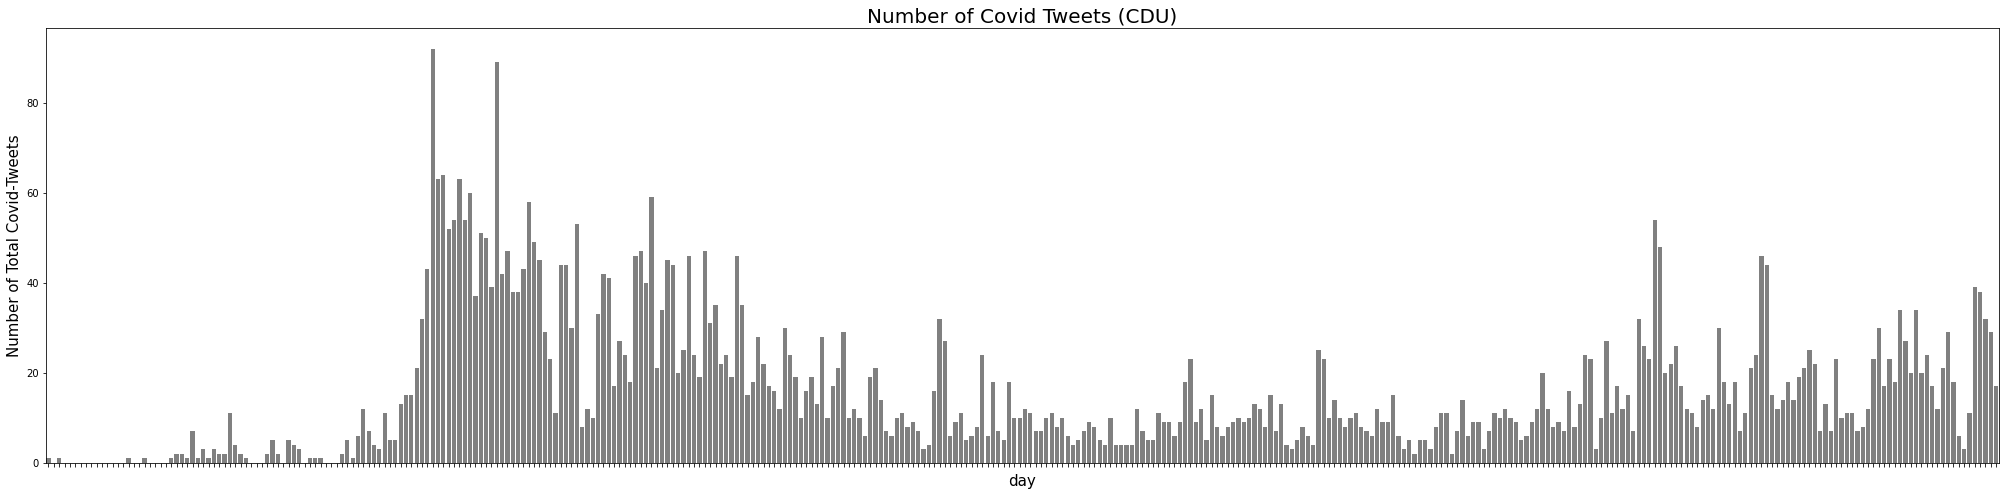

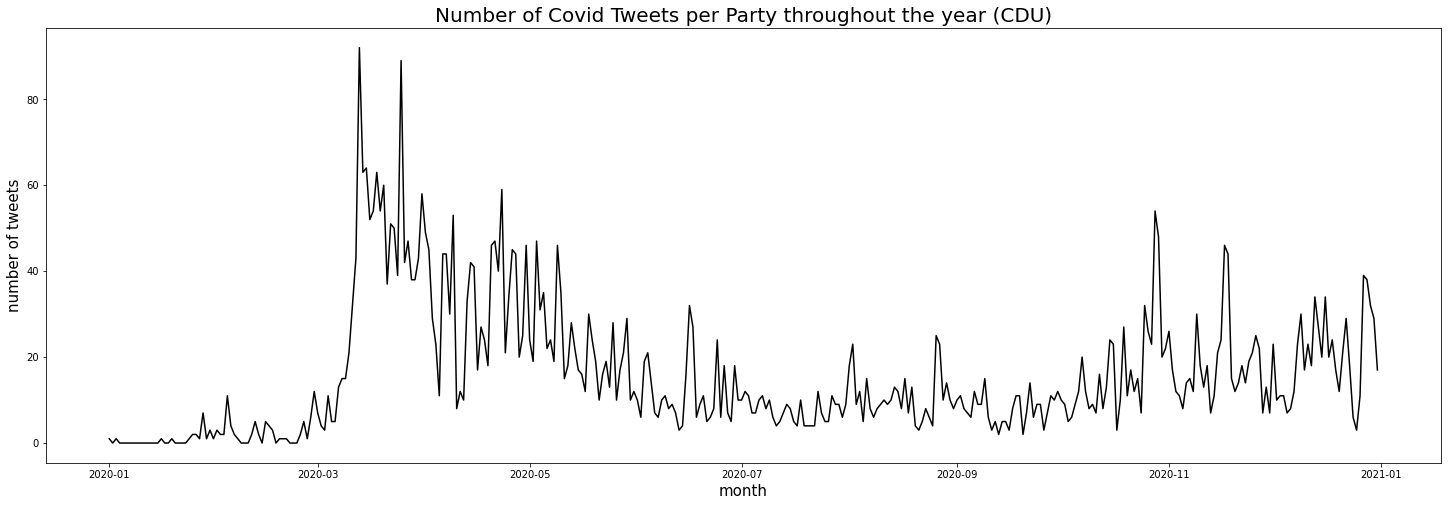

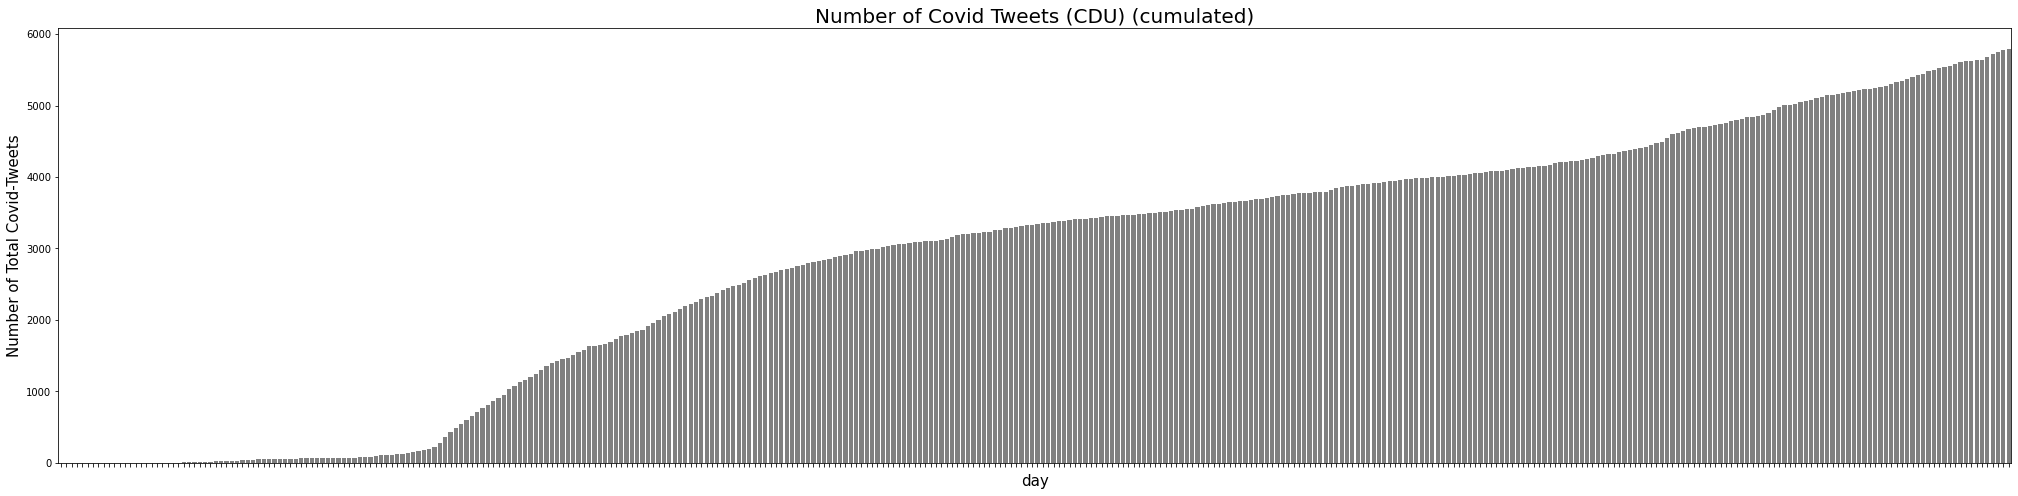

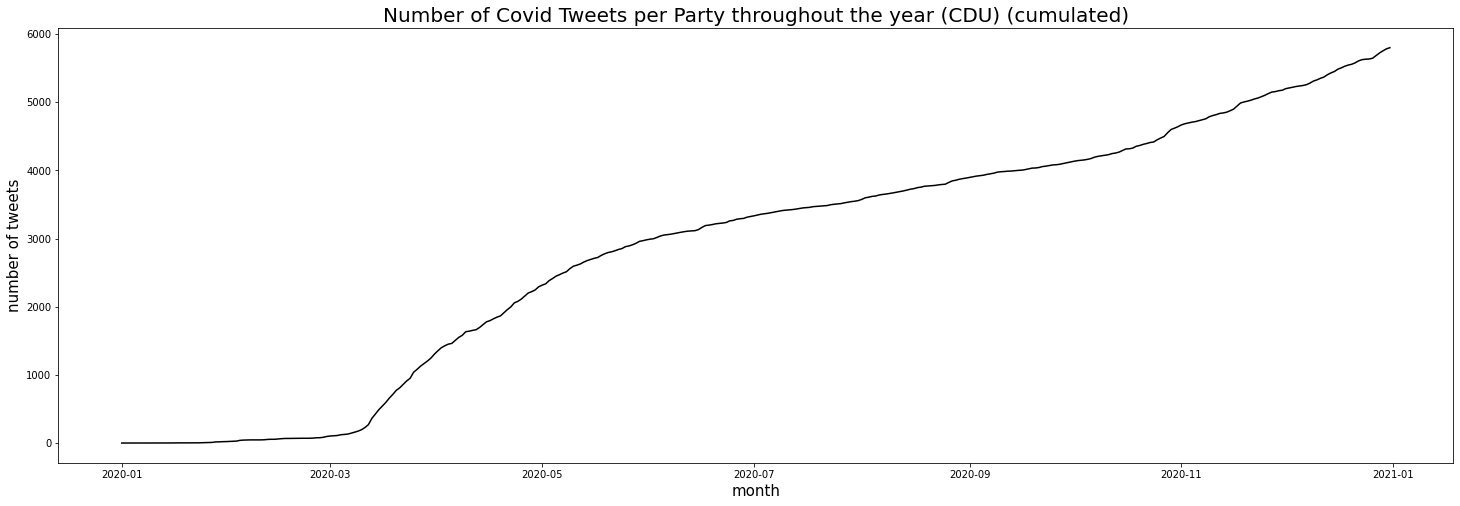

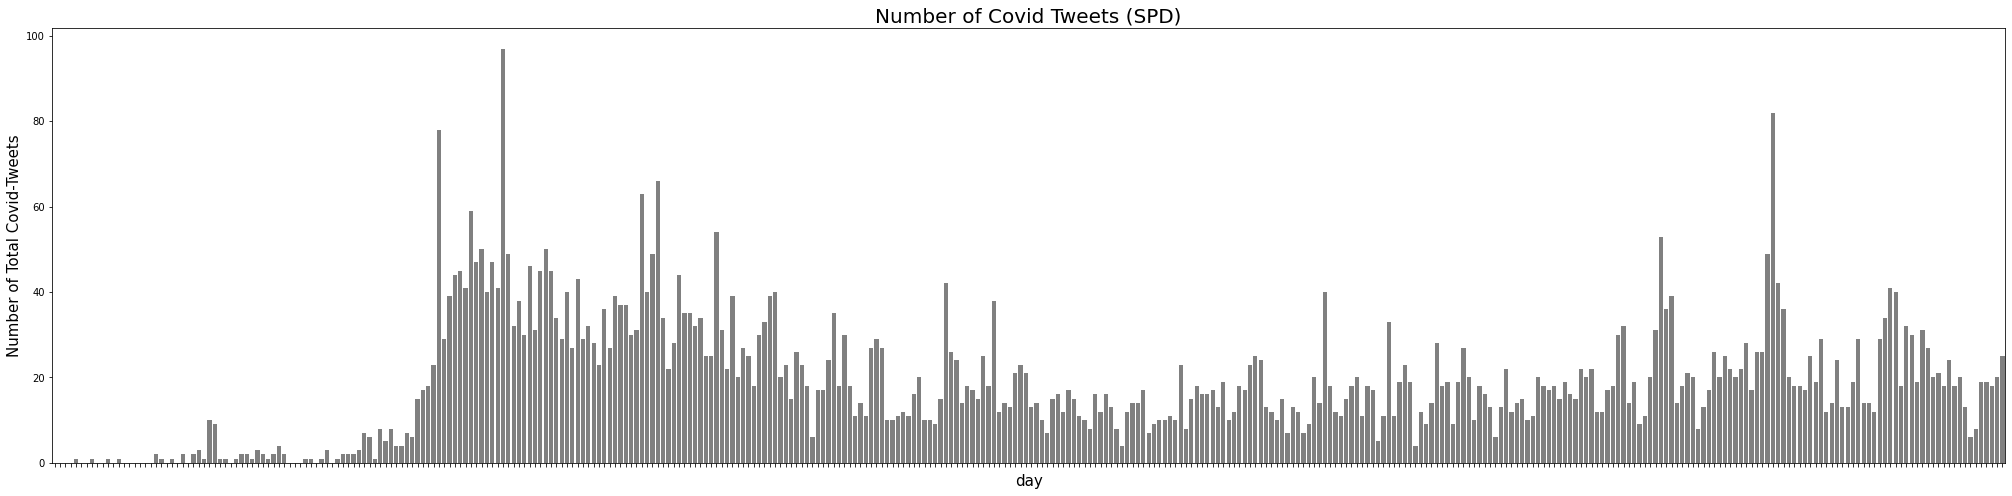

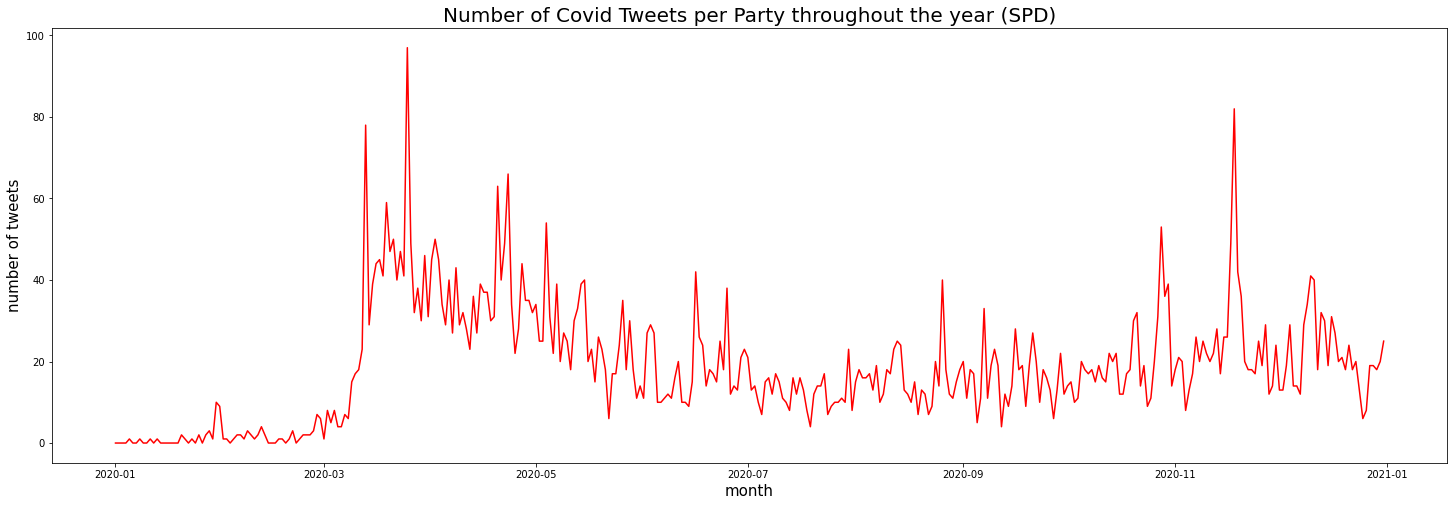

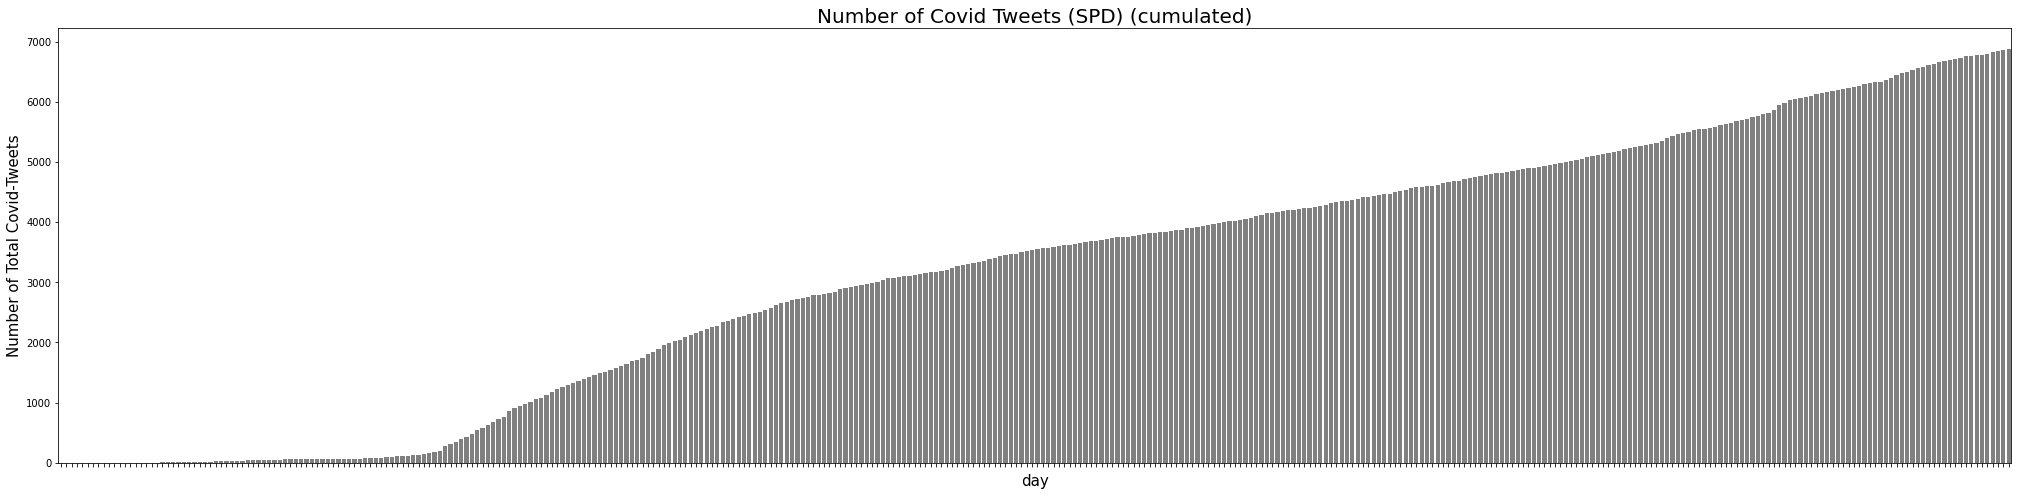

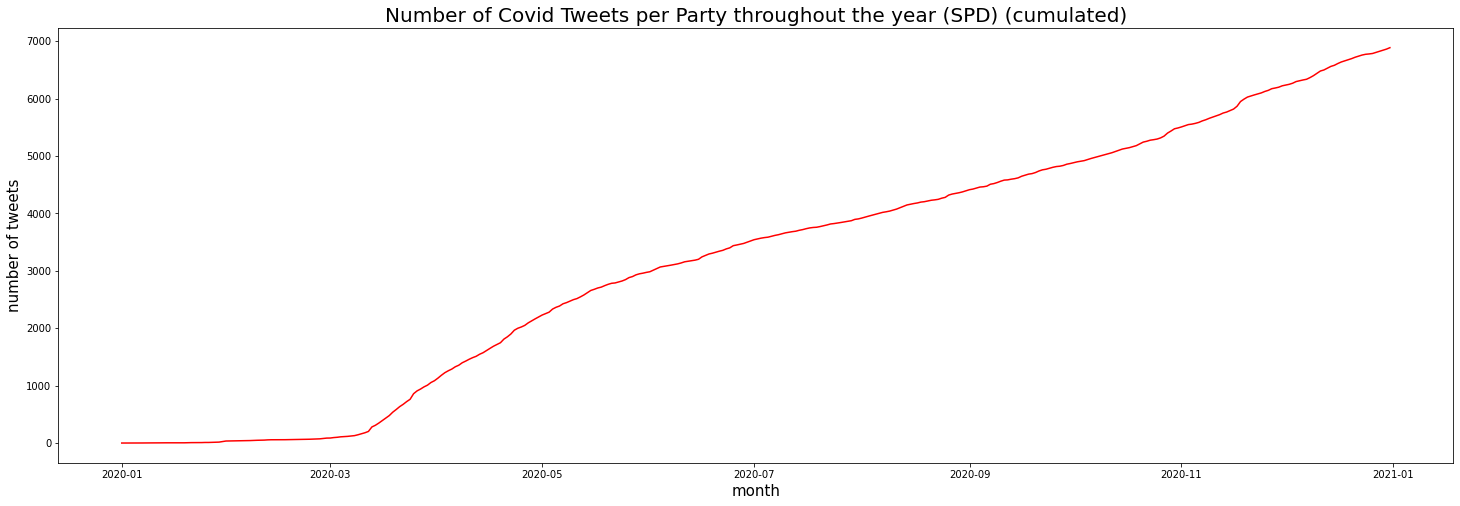

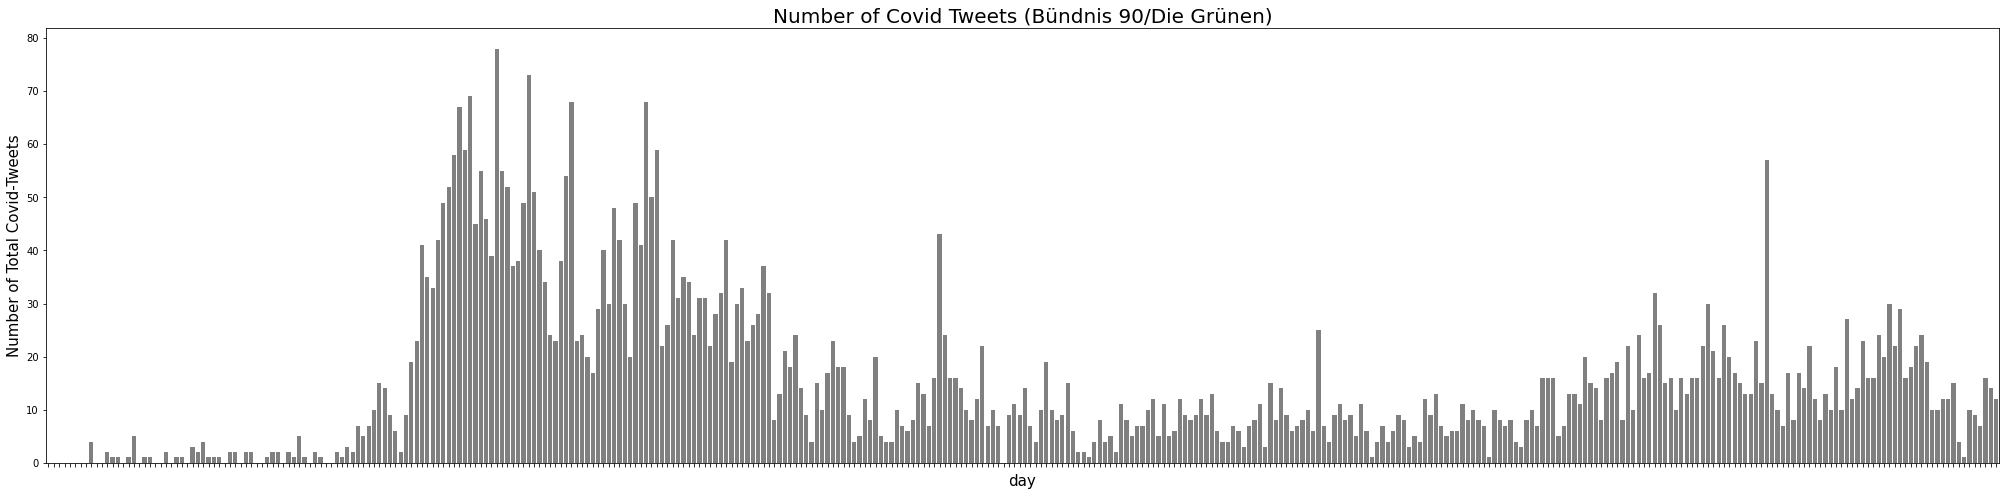

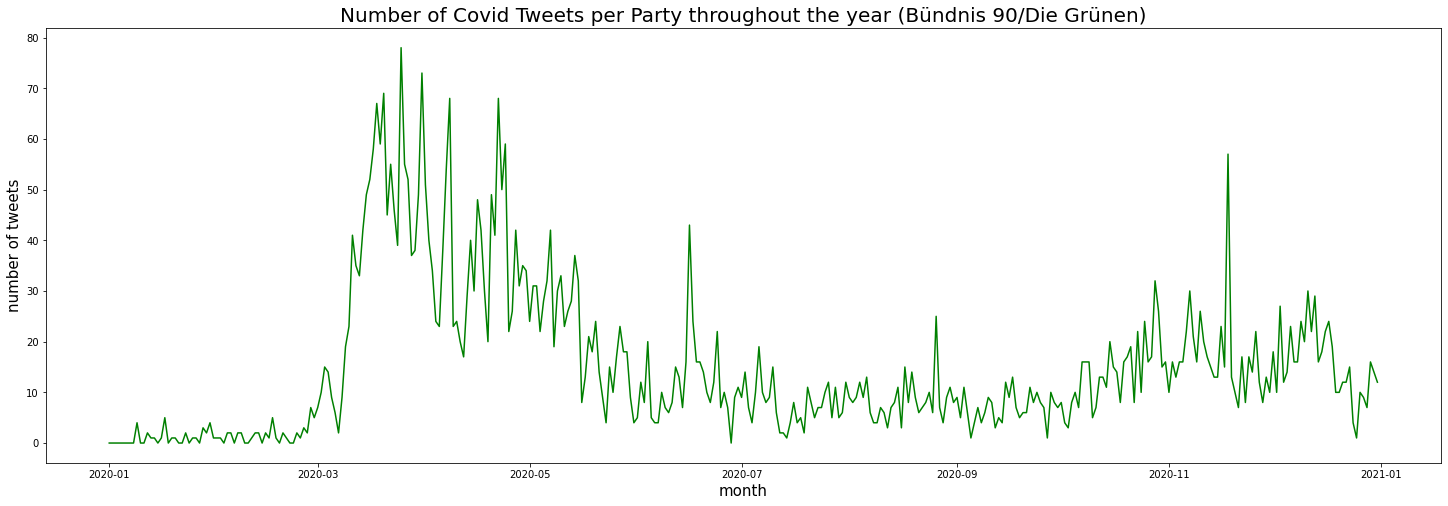

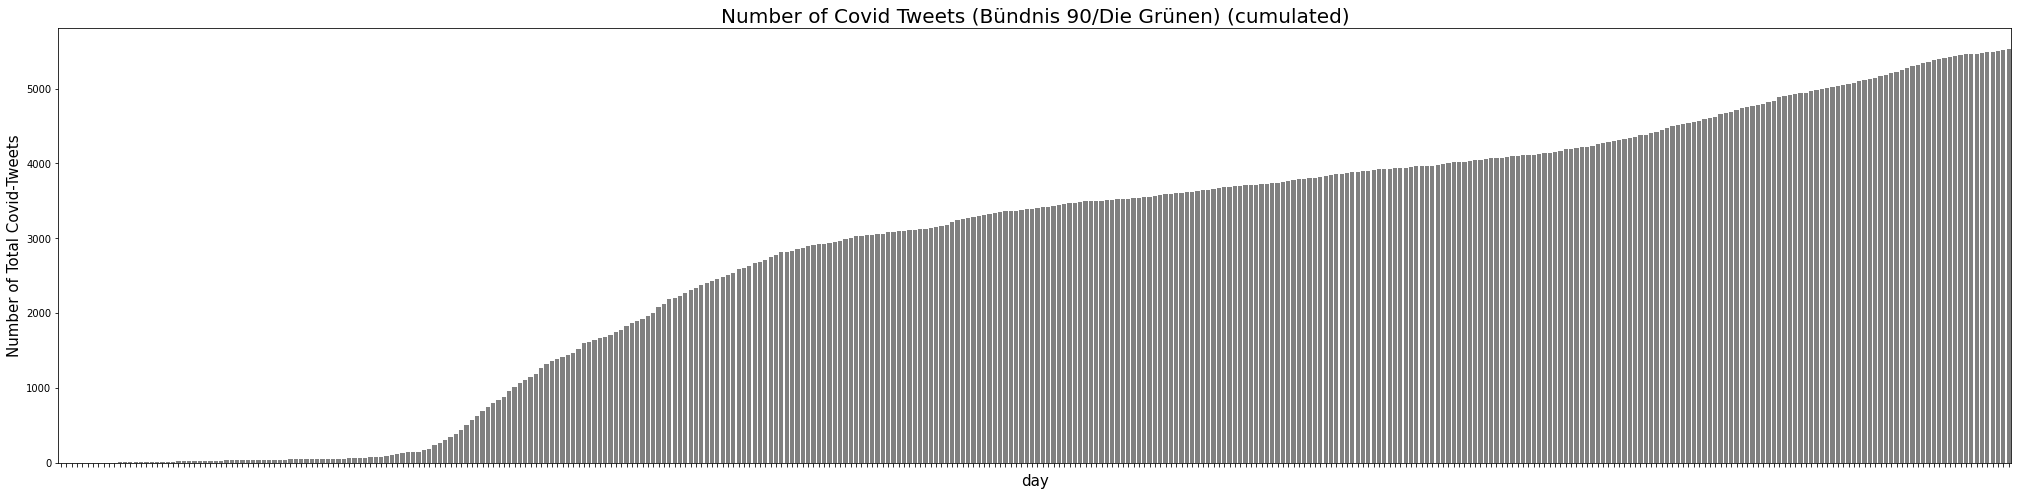

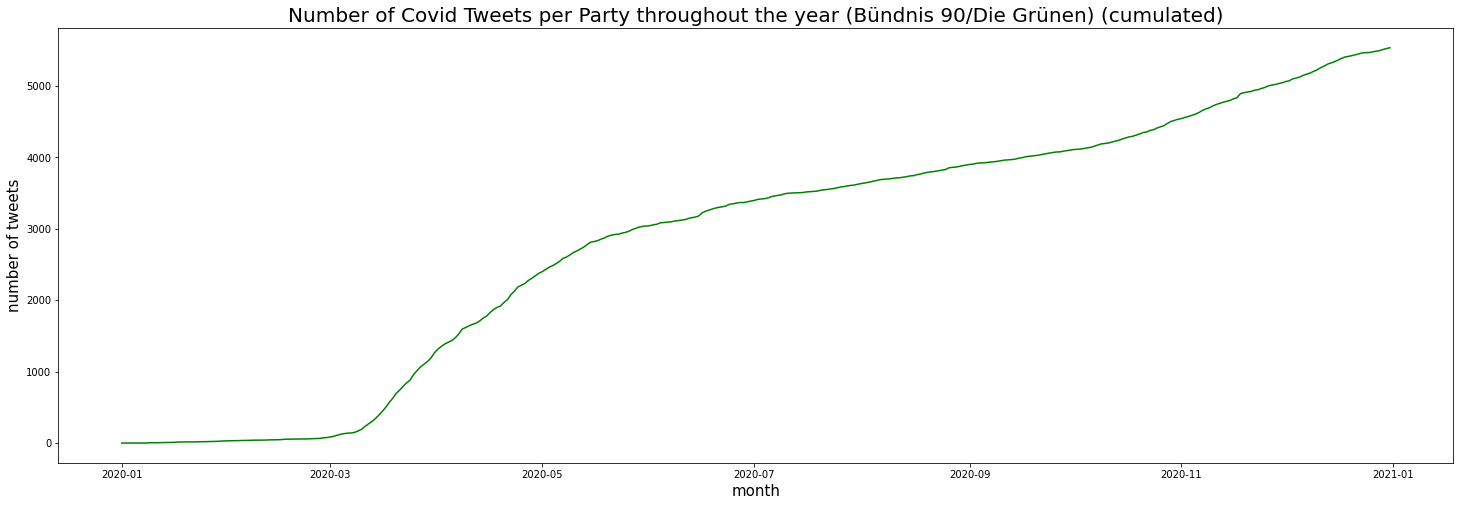

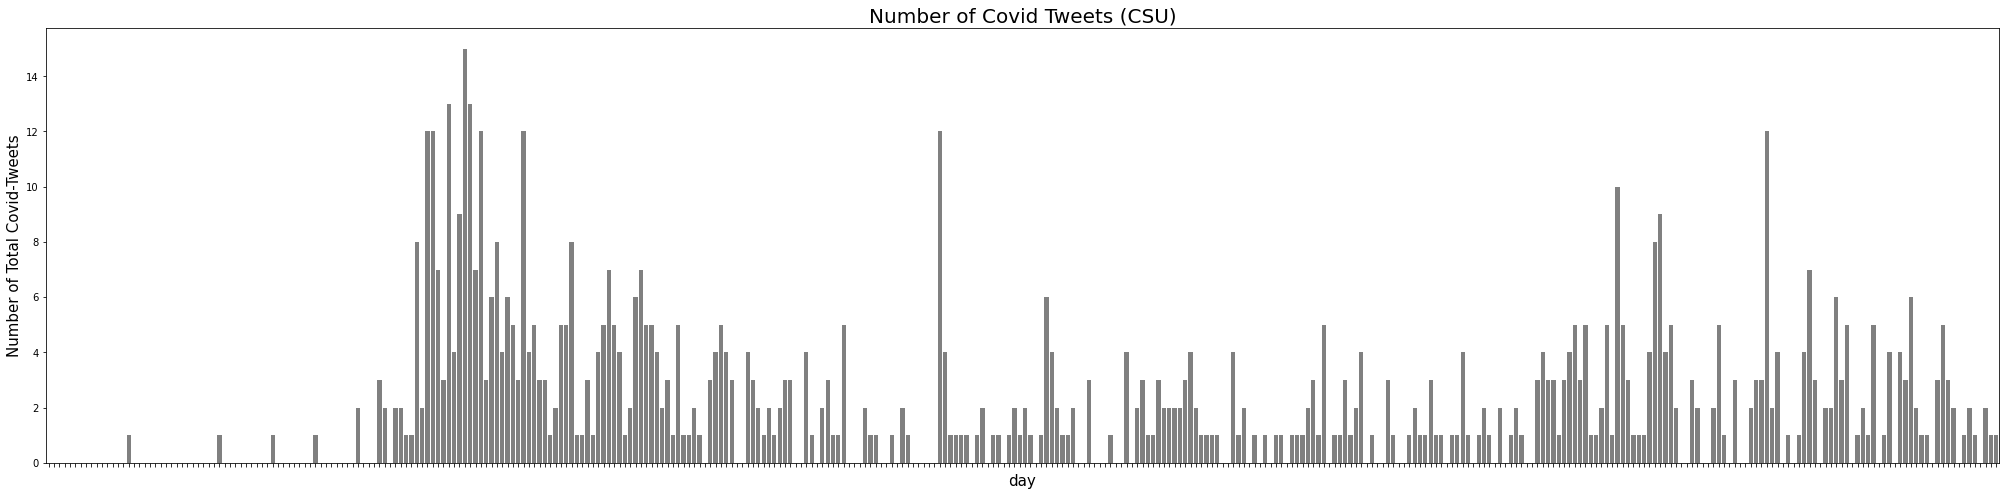

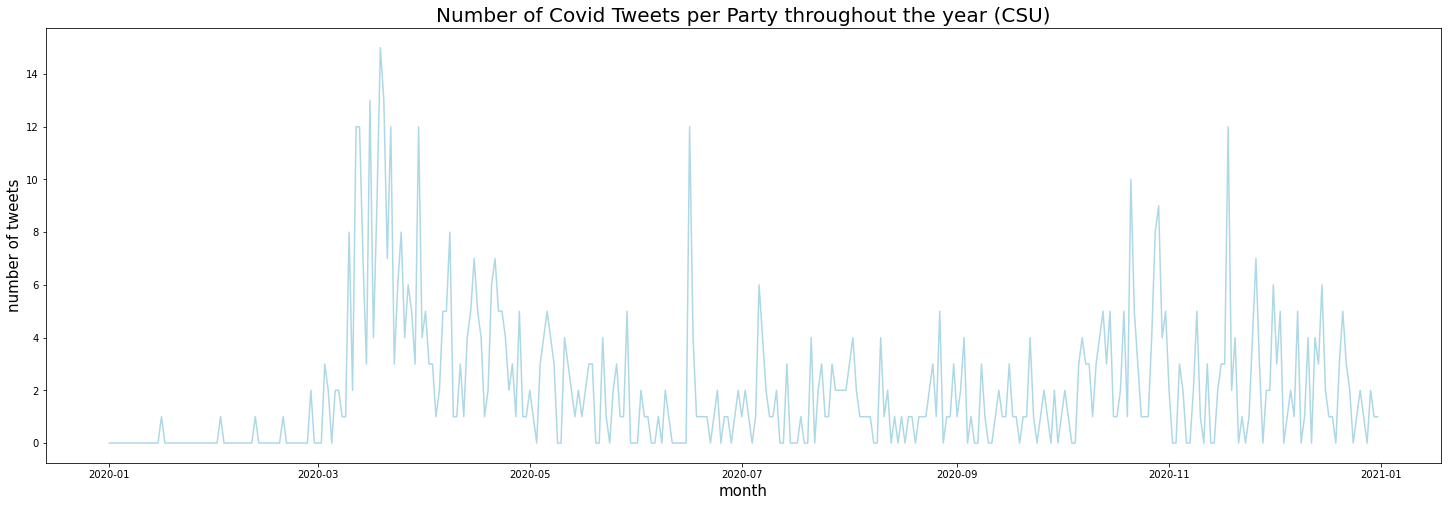

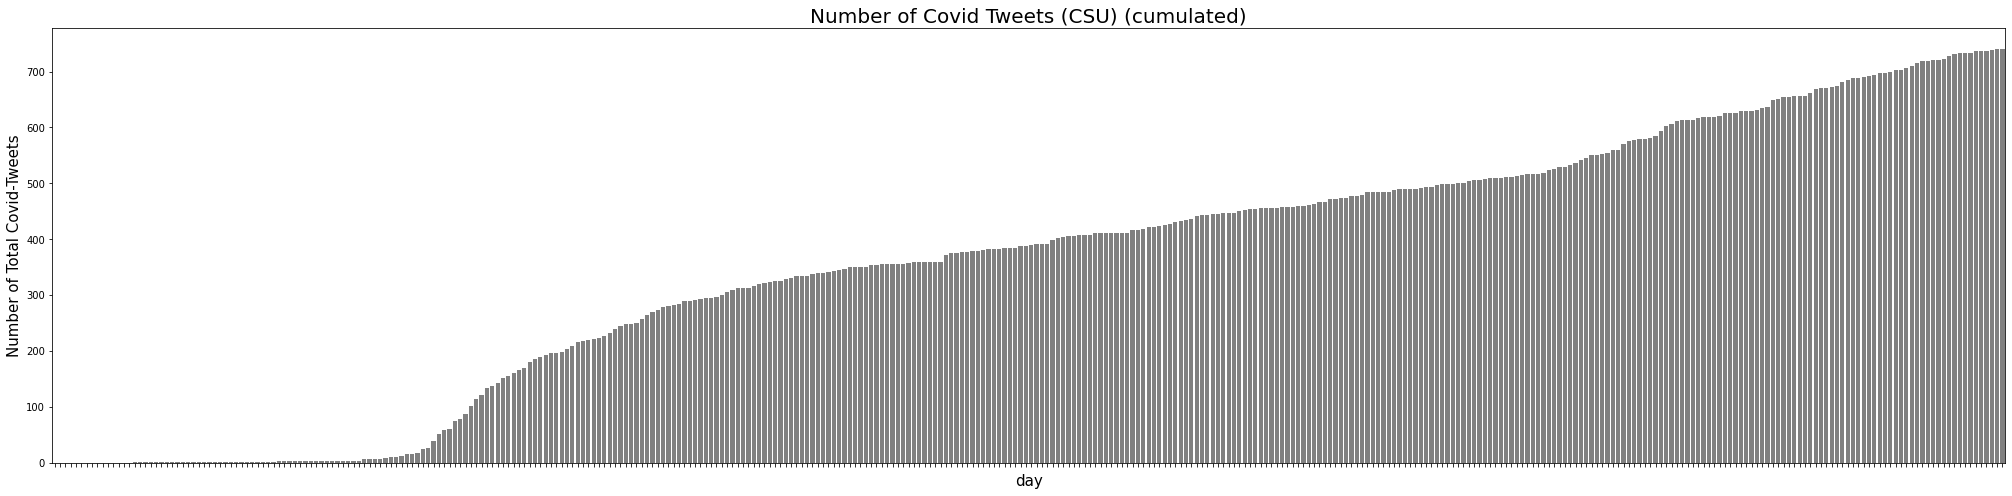

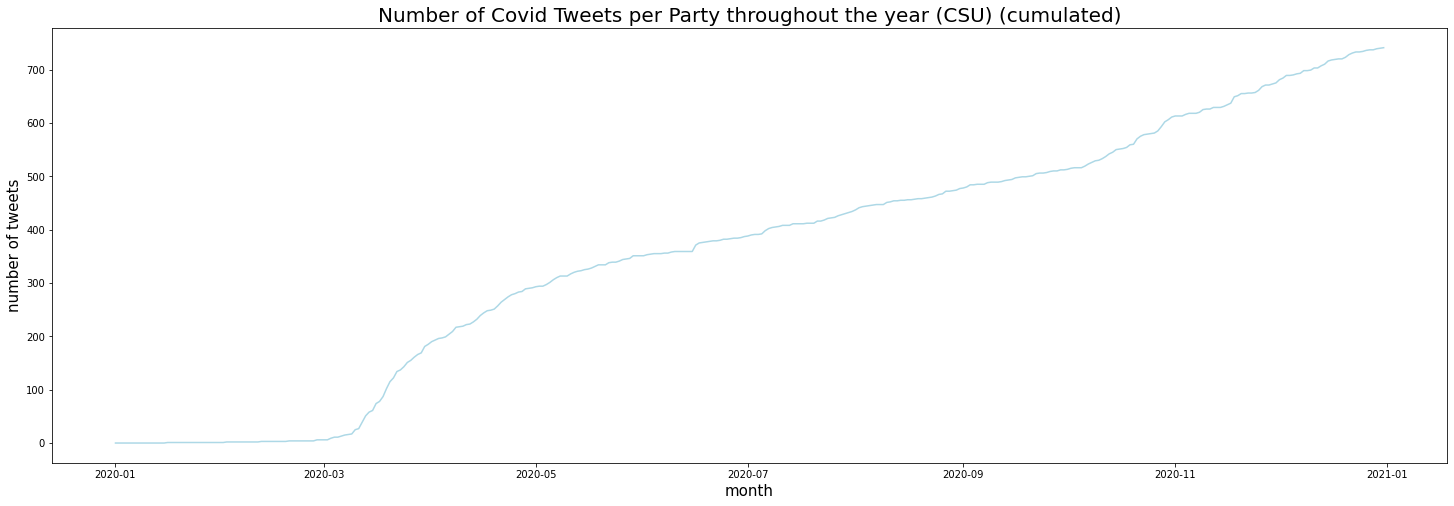

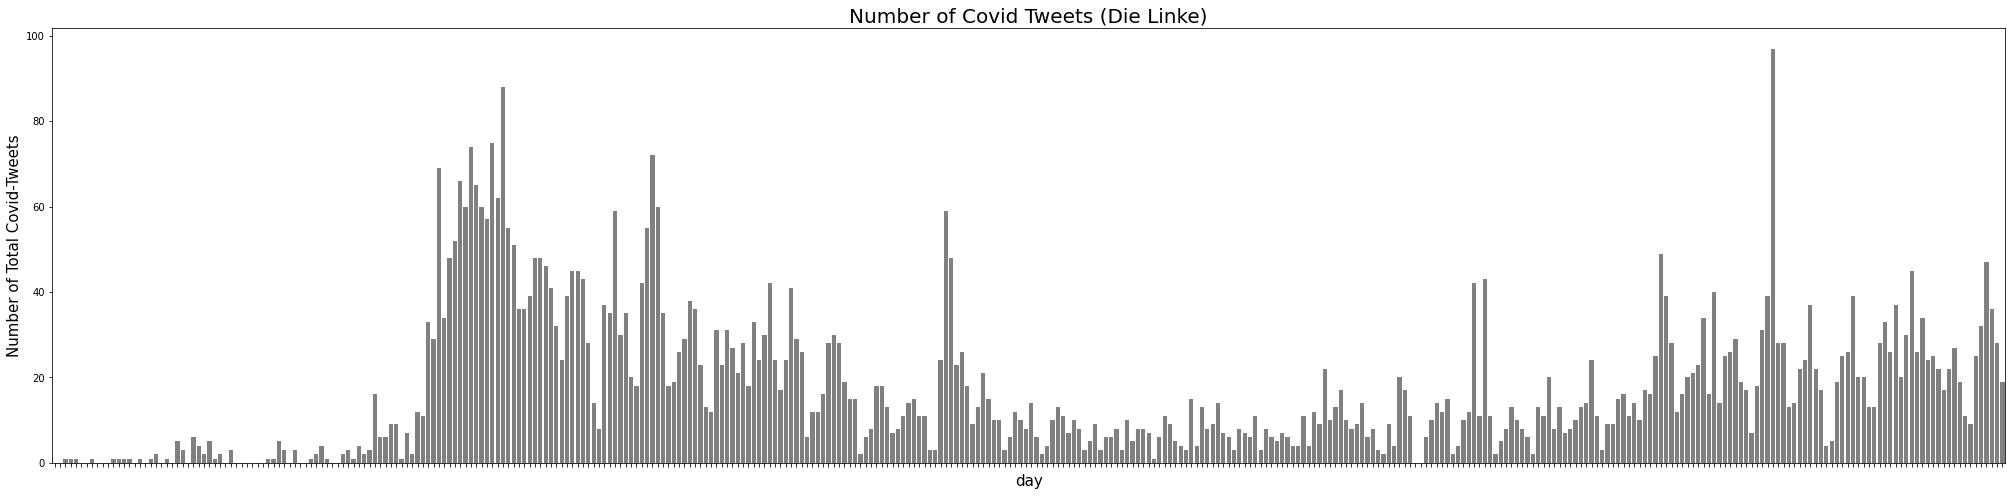

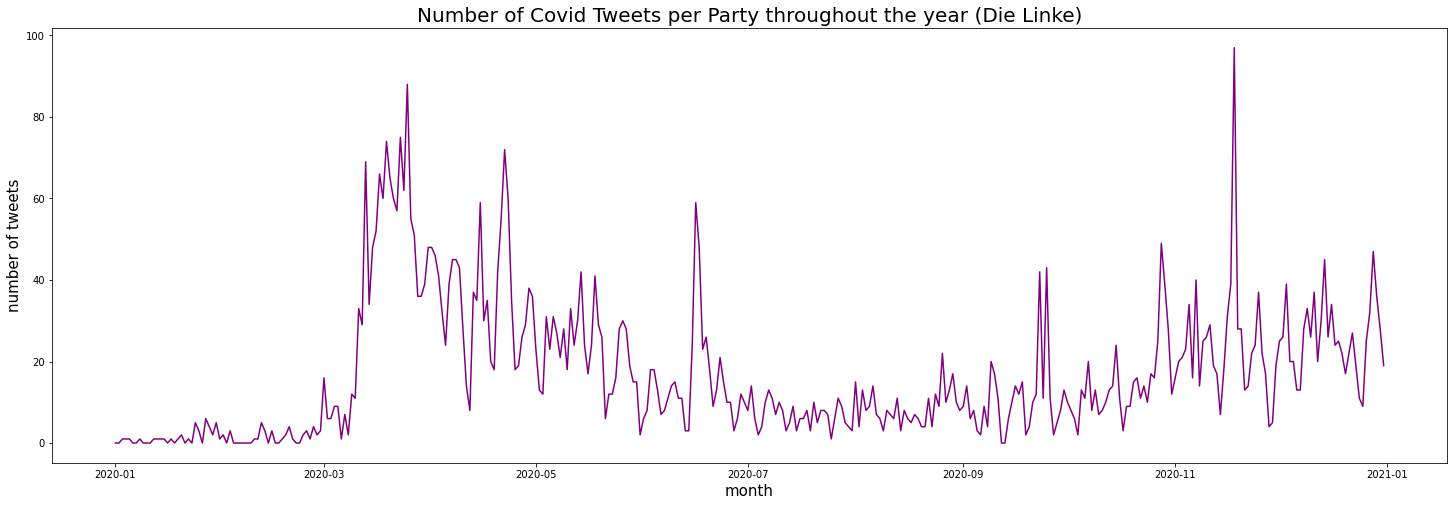

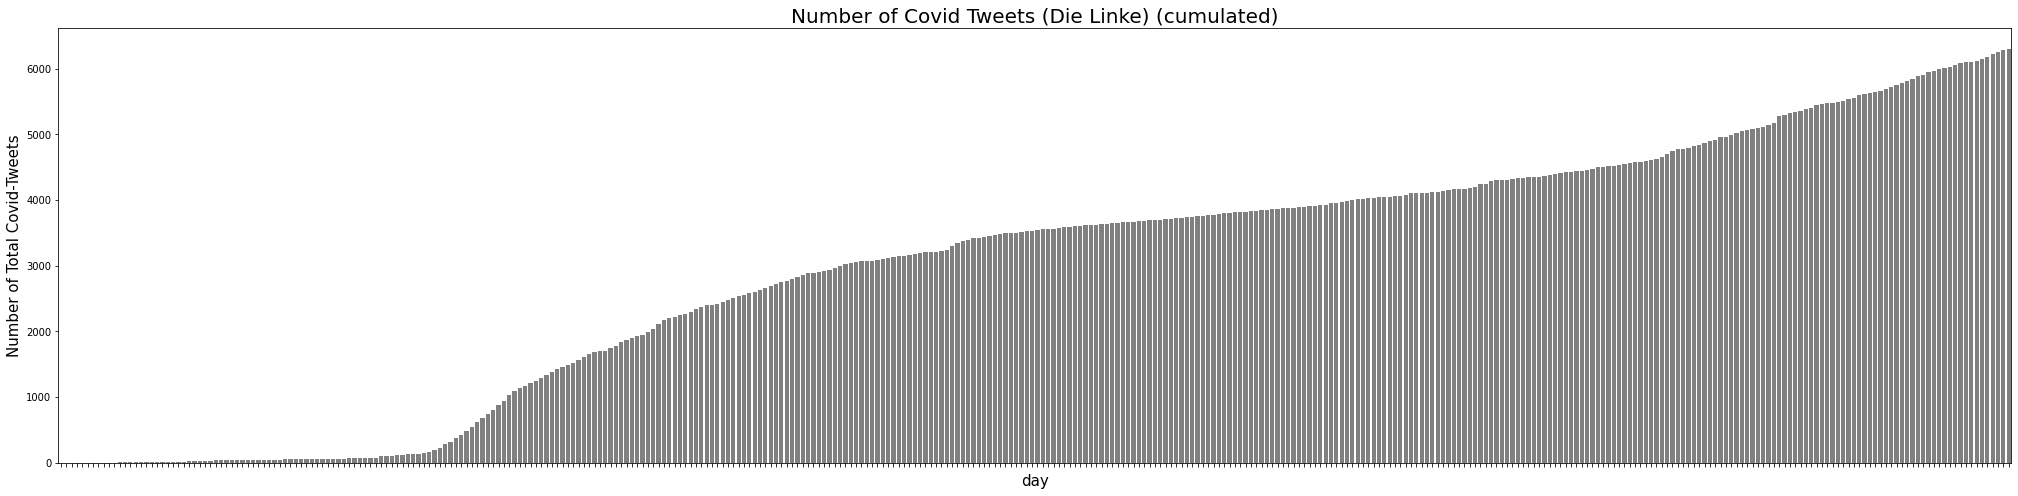

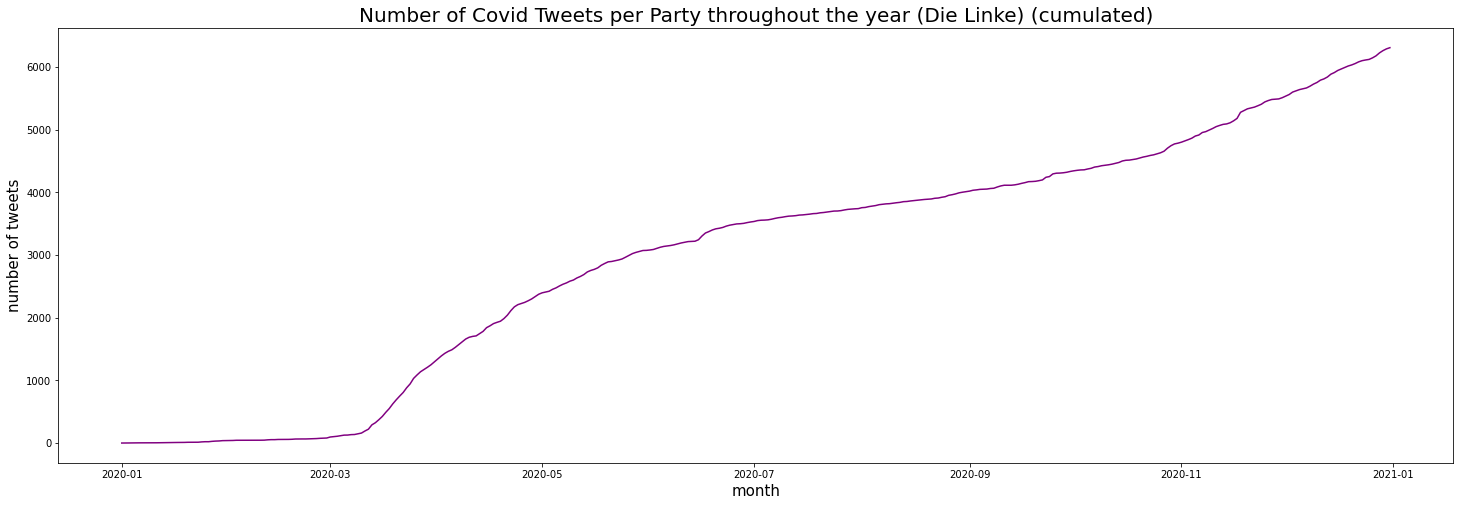

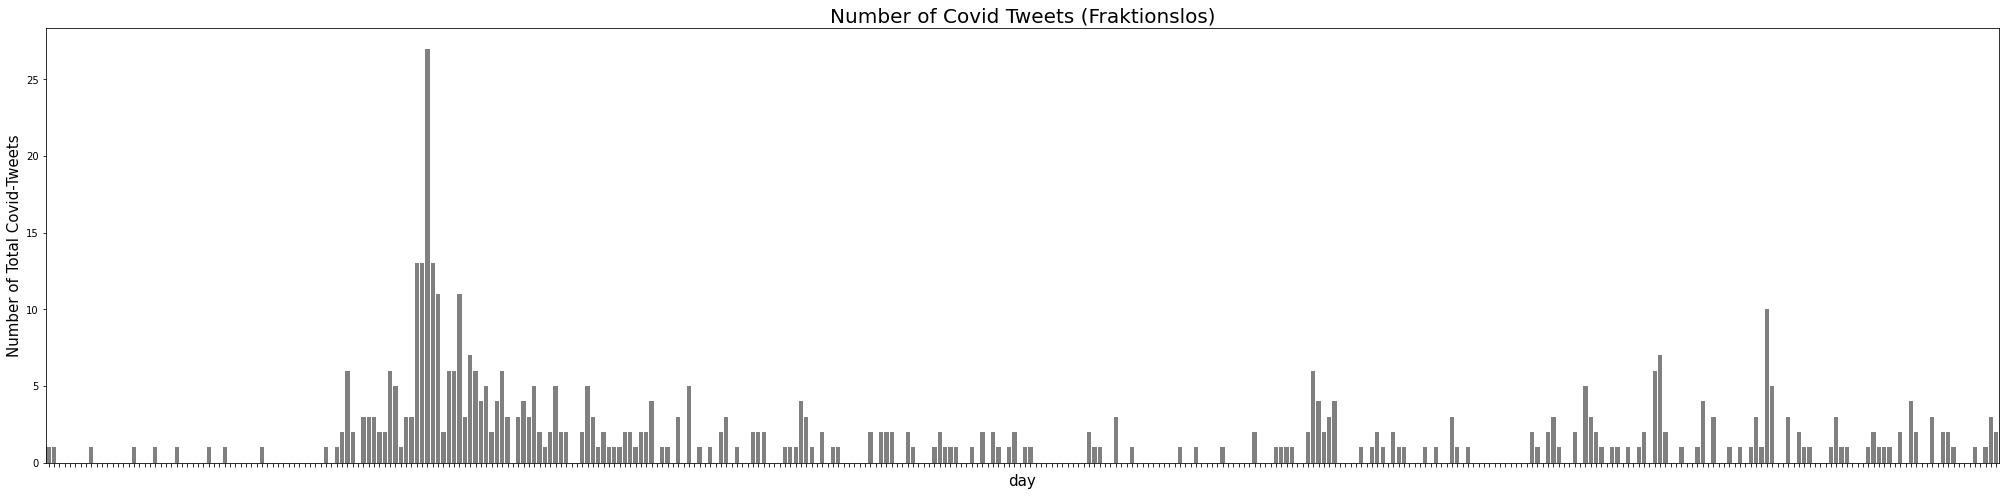

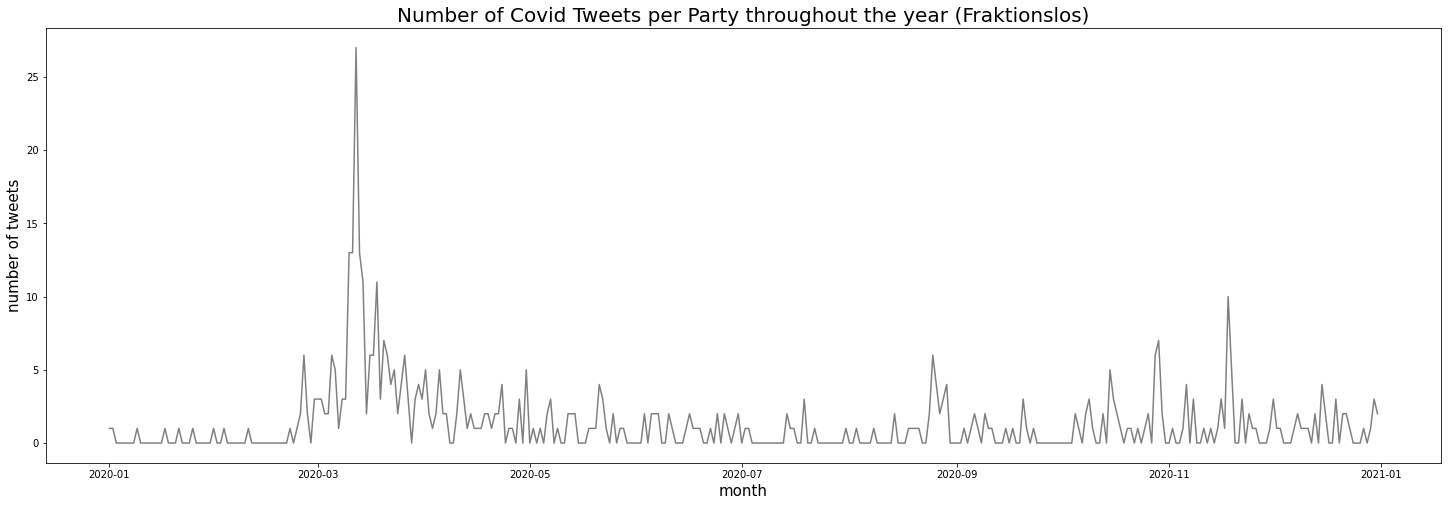

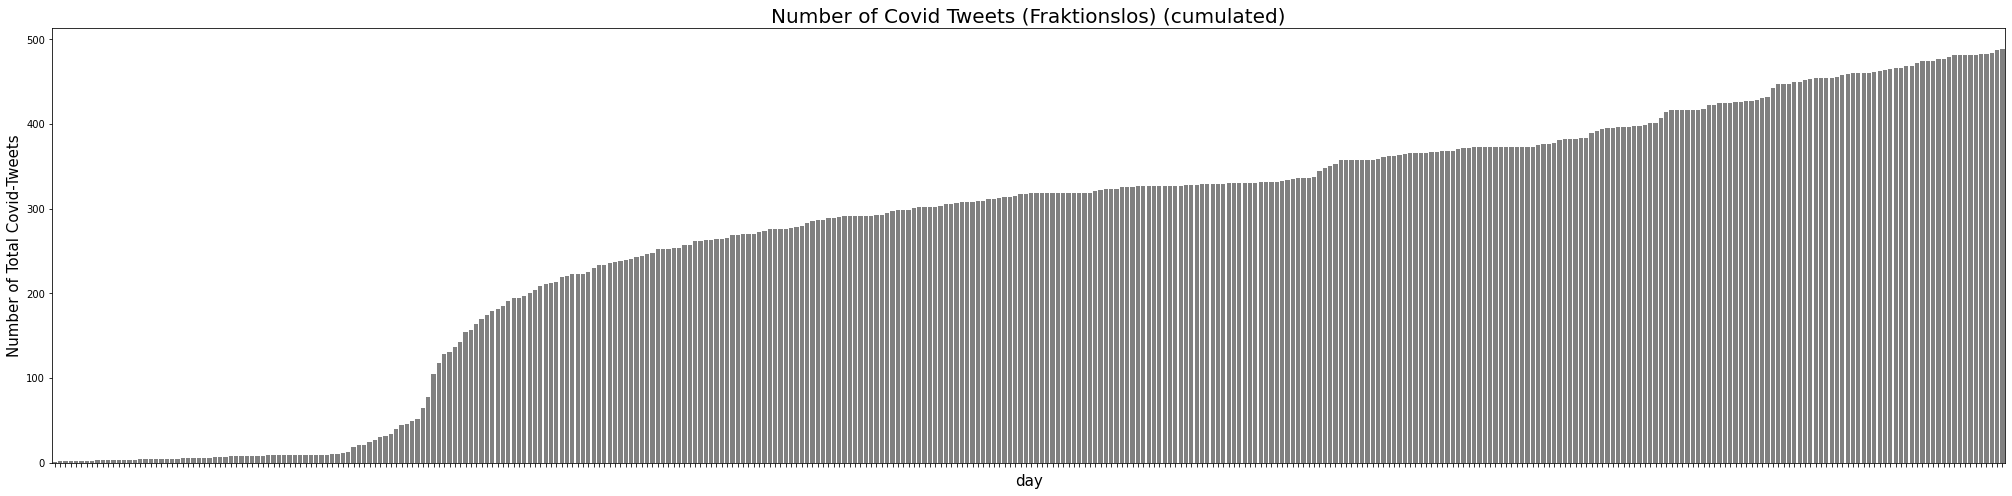

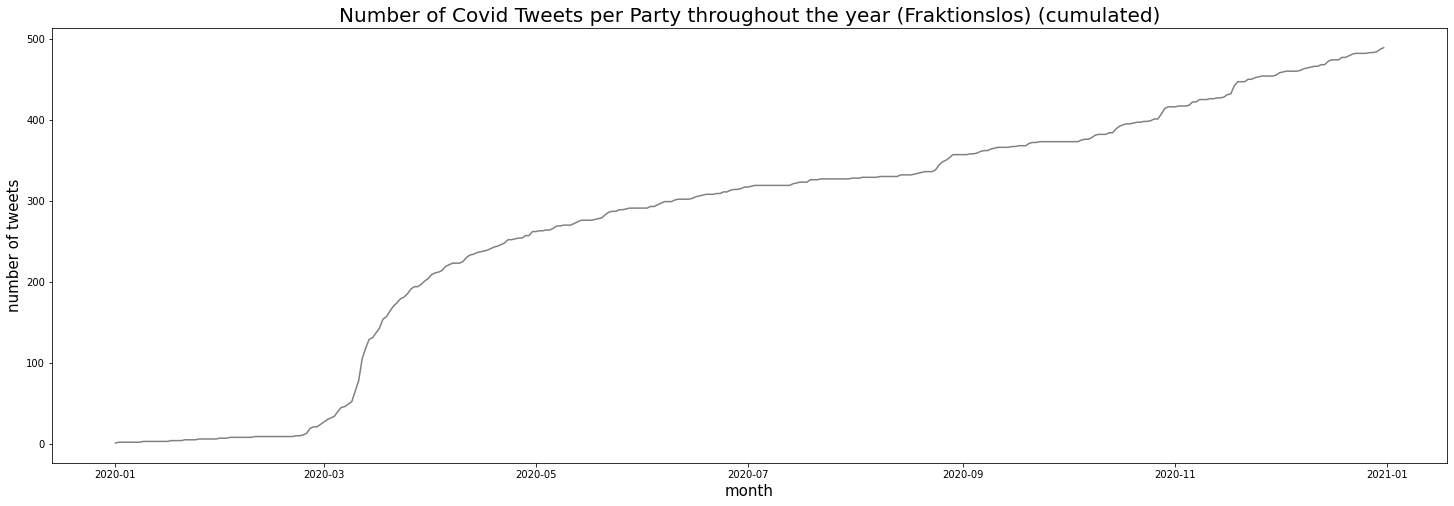

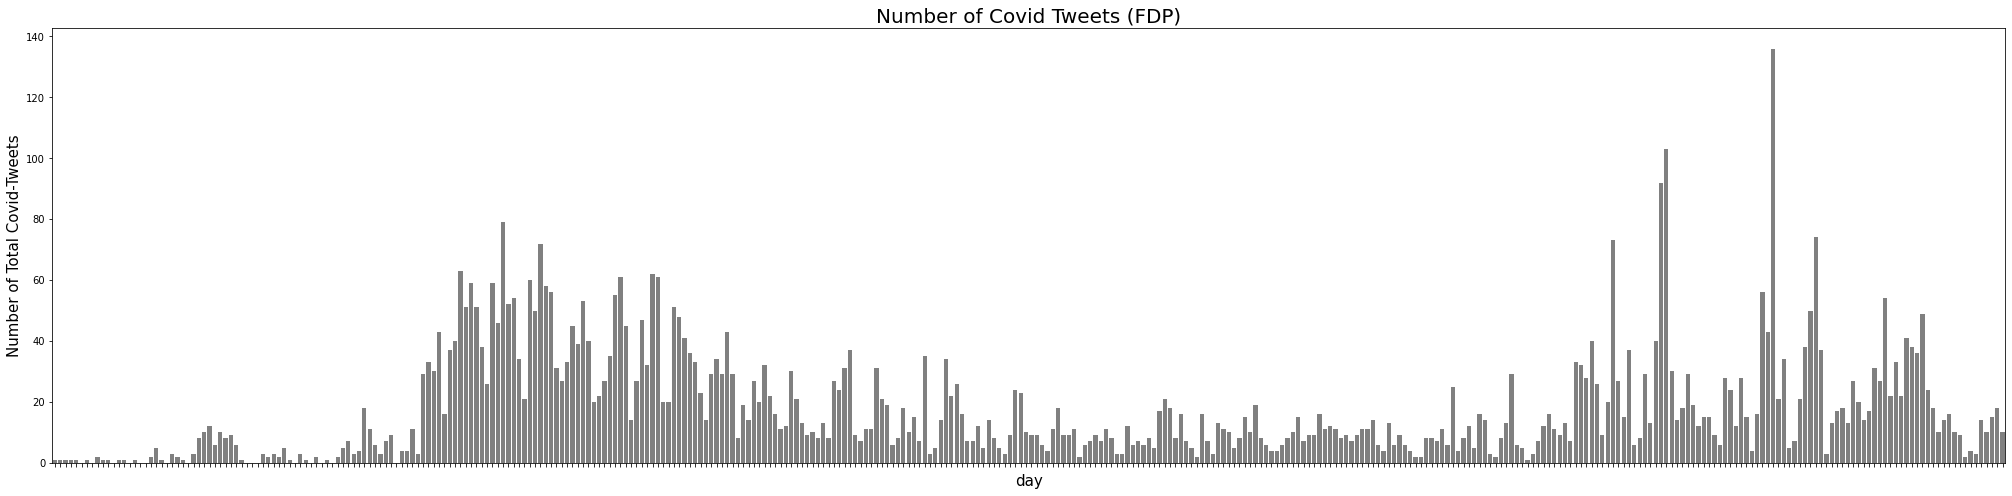

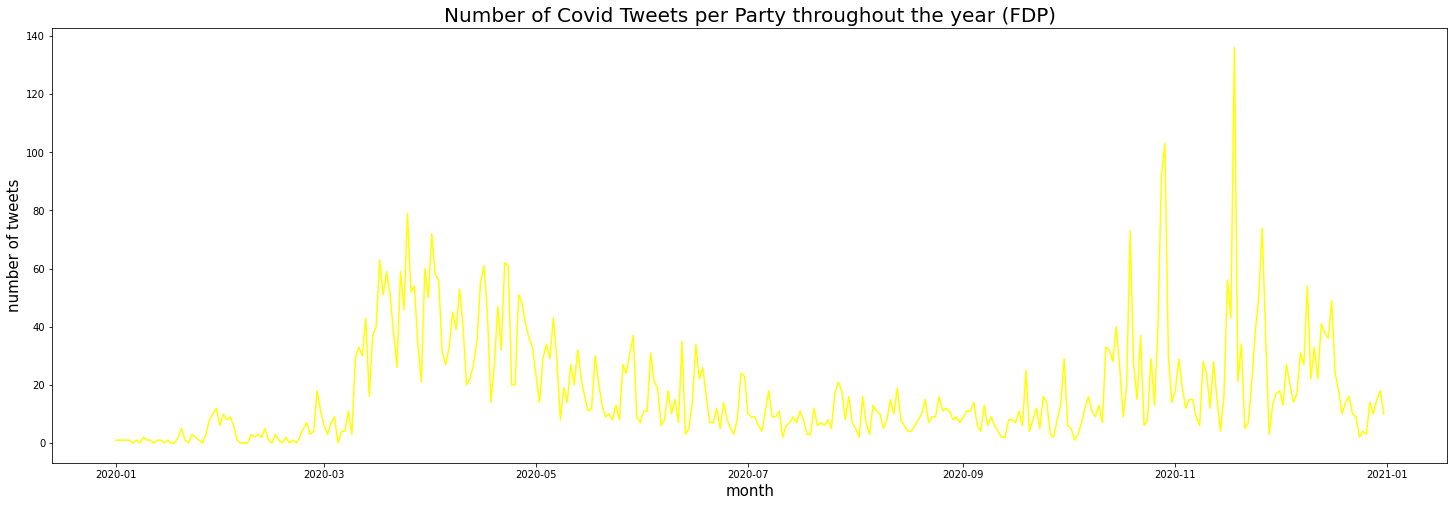

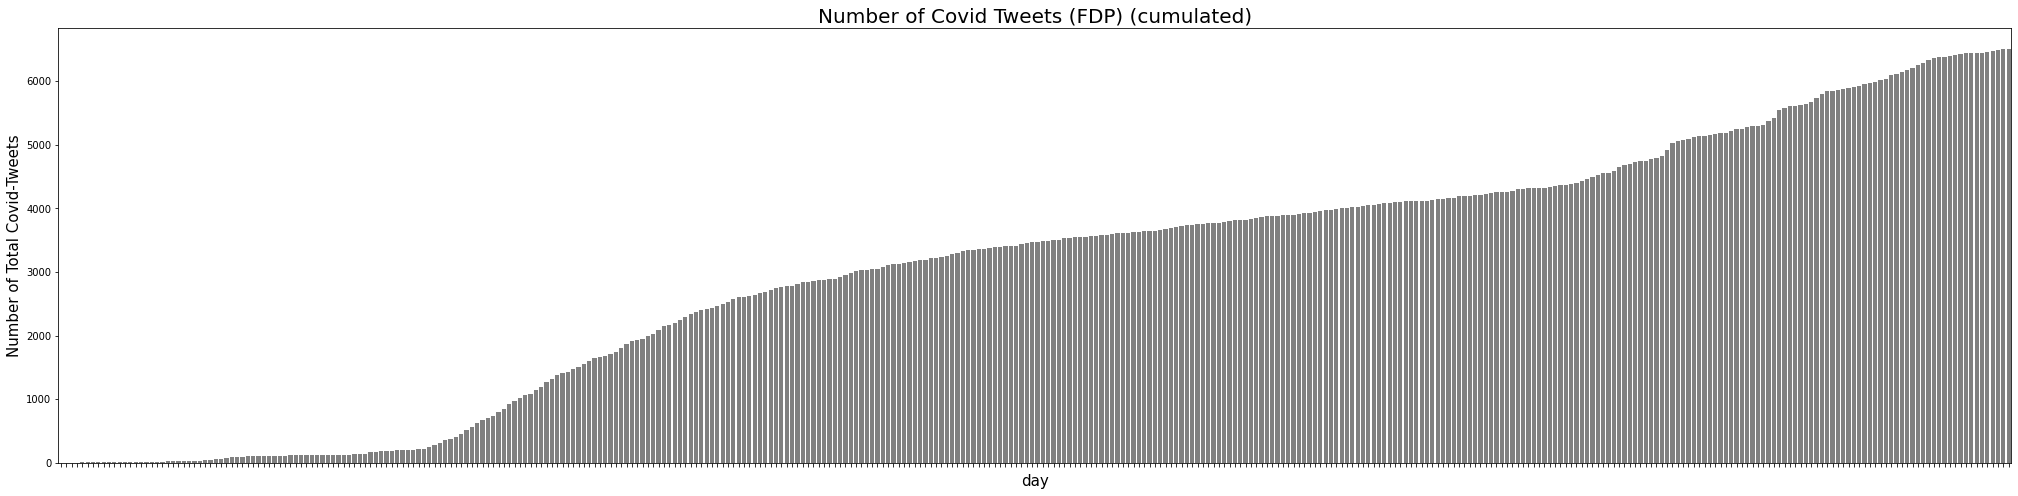

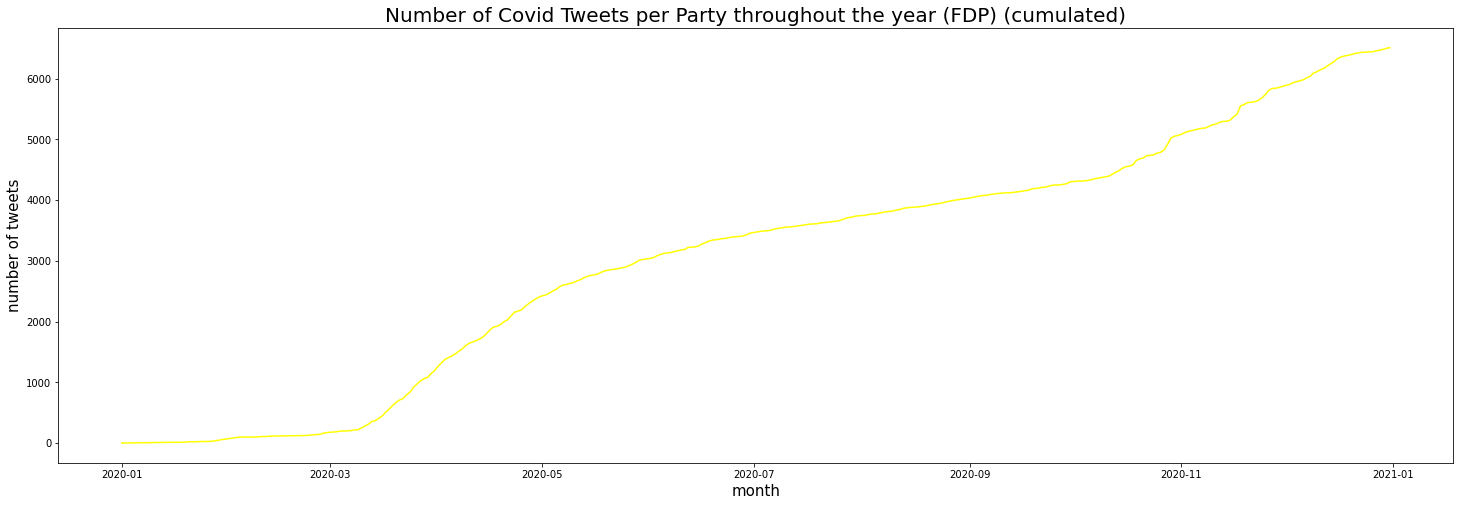

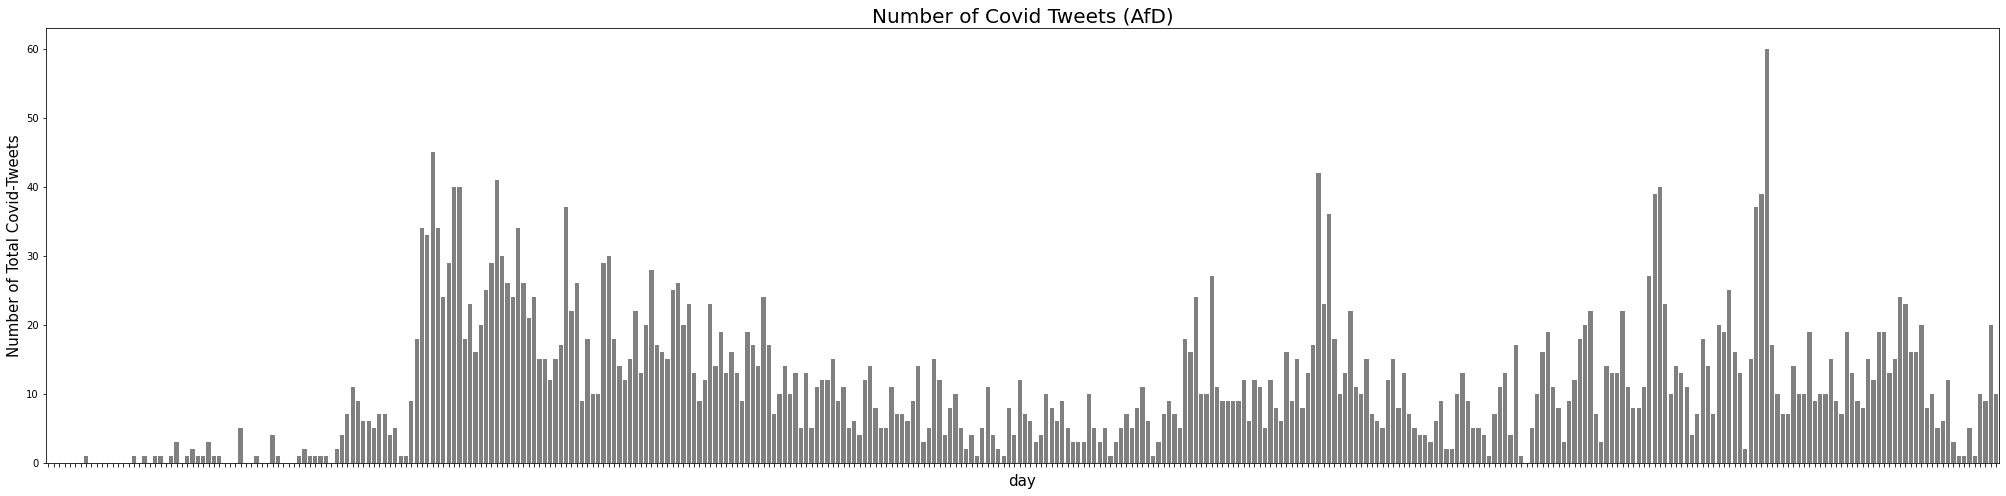

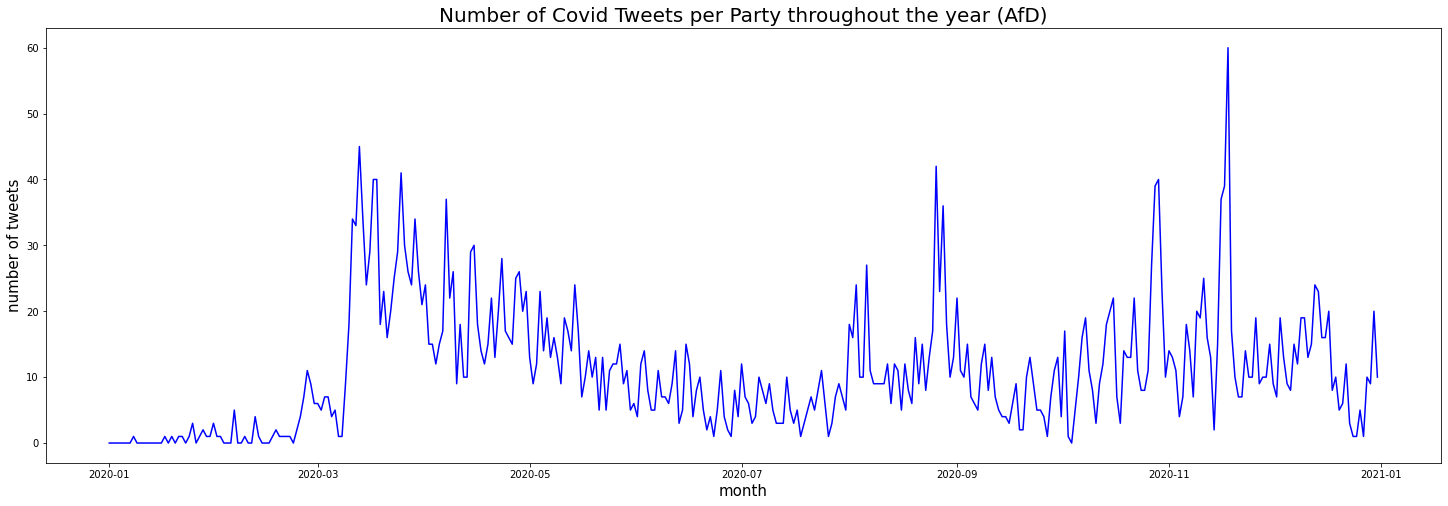

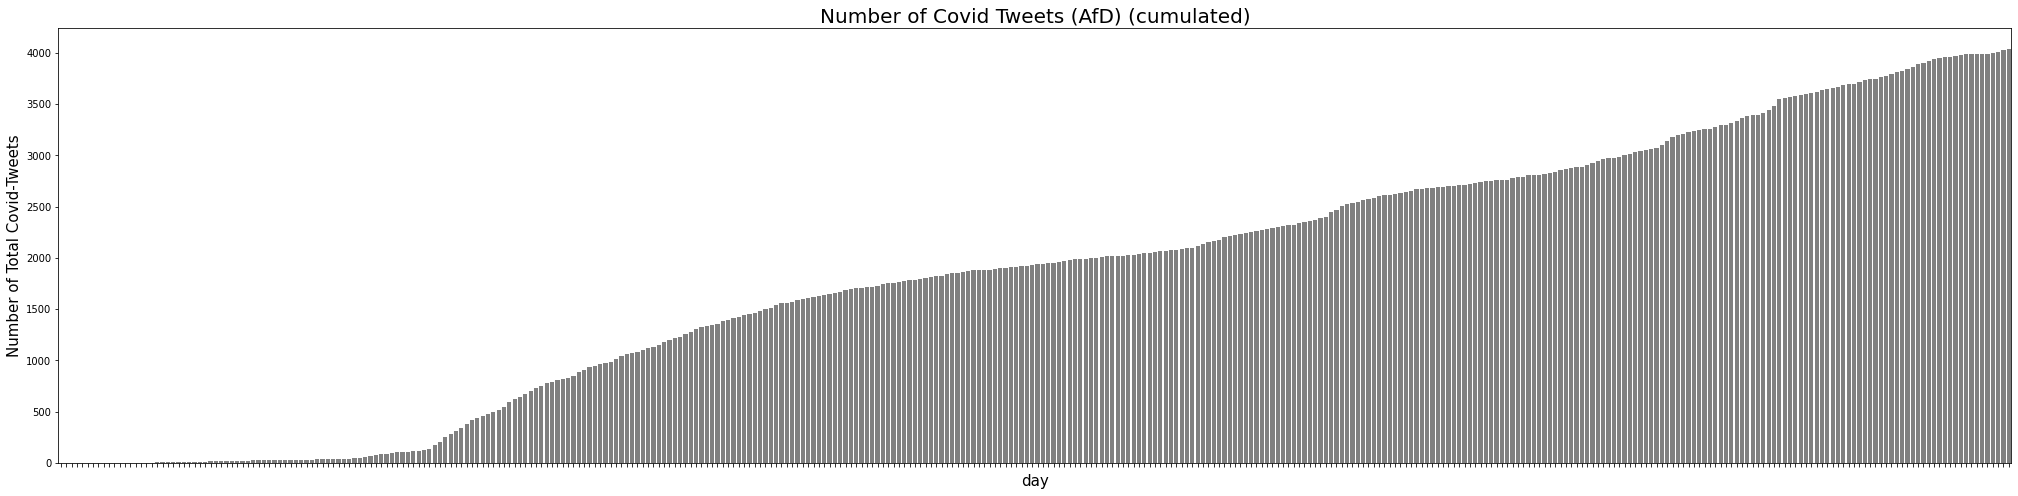

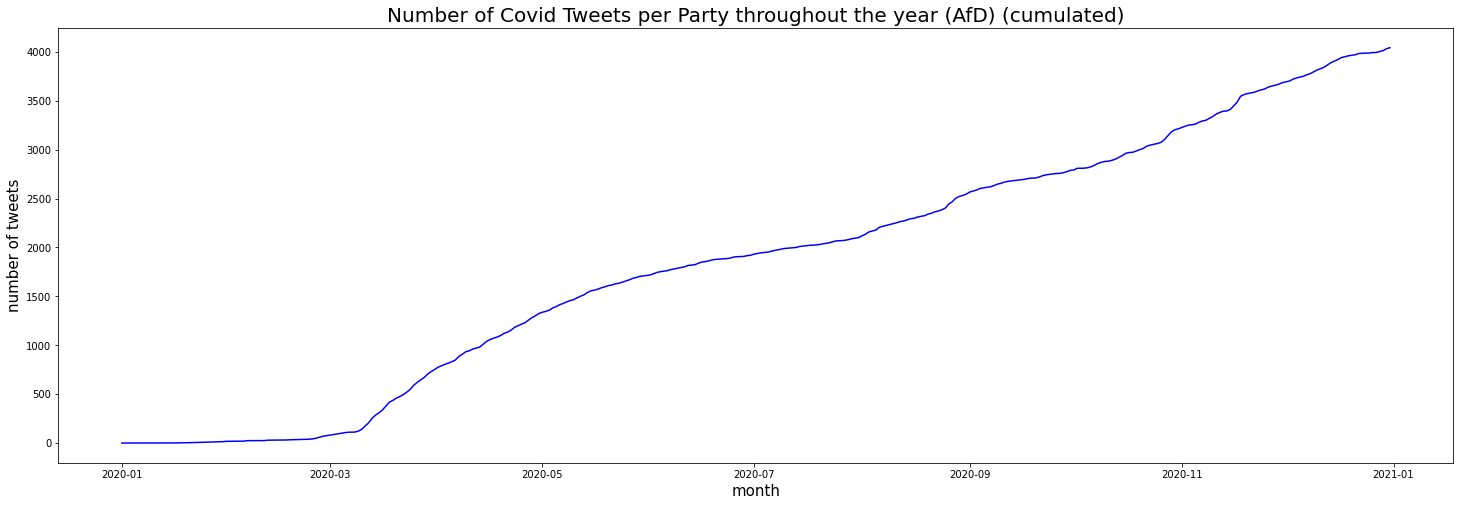

[{'date': DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D'), 'tweets': array([ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  0,  1,  2,  2,  1,  7,  1,  3,  1,  3,  2,  2,
       11,  4,  2,  1,  0,  0,  0,  2,  5,  2,  0,  5,  4,  3,  0,  1,  1,
        1,  0,  0,  0,  2,  5,  1,  6, 12,  7,  4,  3, 11,  5,  5, 13, 15,
       15, 21, 32, 43, 92, 63, 64, 52, 54, 63, 54, 60, 37, 51, 50, 39, 89,
       42, 47, 38, 38, 43, 58, 49, 45, 29, 23, 11, 44, 44, 30, 53,  8, 12,
       10, 33, 42, 41, 17, 27, 24, 18, 46, 47, 40, 59, 21, 34, 45, 44, 20,
    

In [55]:
df_tweets_stats_year = df_tweets_stats.copy()
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)
df_tweets_stats_year['created at']=pd.to_datetime(df_tweets_stats_year['created at'], utc= True).dt.date
df_tweets_stats_year = df_tweets_stats_year.loc[(df_tweets_stats_year['created at'] >= start_date) & (df_tweets_stats_year['created at'] <= end_date)]


for i in parties:
    df_tweets_stats_year_per_party = df_tweets_stats_year[df_tweets_stats_year['party'] == i]
    df_tweets_stats_year_per_party = df_tweets_stats_year_per_party.pivot_table(index=['created at'], aggfunc='size')
    df_tweets_stats_year_per_party = df_tweets_stats_year_per_party.reindex(pd.date_range('01/1/2020','12/31/2020'), fill_value=0)
    df_tweets_stats_year_per_party = pd.DataFrame({'date':df_tweets_stats_year_per_party.index, 'tweets':df_tweets_stats_year_per_party.values})
    df_tweets_stats_year_per_party['date']=pd.to_datetime(df_tweets_stats_year_per_party['date'], utc= True).dt.date
    df_tweets_stats_year_per_party_cumulated = df_tweets_stats_year_per_party.copy()
    df_tweets_stats_year_per_party_cumulated['tweets']=df_tweets_stats_year_per_party_cumulated['tweets'].cumsum(axis = 0)


    fig, ax = plt.subplots(figsize=(35,8))
    chart = sns.barplot(data=df_tweets_stats_year_per_party, x='date', y='tweets', color='grey')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=5)
    ax.set_xticklabels([])
    chart.set_title(f'Number of Covid Tweets ({i})', fontsize = 20)
    chart.set_xlabel('day', fontsize = 15)
    chart.set_ylabel('Number of Total Covid-Tweets', fontsize = 15)
    plt.show()

    plt.figure(figsize=(25,8))
    chart = sns.lineplot(x='date', y='tweets', data=df_tweets_stats_year_per_party, color=party_colors[i])
    plt.title(f"Number of Covid Tweets per Party throughout the year ({i})", fontsize = 20)
    plt.xlabel("month", fontsize = 15)
    plt.ylabel("number of tweets", fontsize = 15)
    plt.show()

    fig, ax = plt.subplots(figsize=(35,8))
    chart = sns.barplot(data=df_tweets_stats_year_per_party_cumulated, x='date', y='tweets', color='grey')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=5)
    ax.set_xticklabels([])
    chart.set_title(f'Number of Covid Tweets ({i}) (cumulated)', fontsize = 20)
    chart.set_xlabel('day', fontsize = 15)
    chart.set_ylabel('Number of Total Covid-Tweets', fontsize = 15)
    plt.show()

    plt.figure(figsize=(25,8))
    chart = sns.lineplot(x='date', y='tweets', data=df_tweets_stats_year_per_party_cumulated, color=party_colors[i])
    plt.title(f"Number of Covid Tweets per Party throughout the year ({i}) (cumulated)", fontsize = 20)
    plt.xlabel("month", fontsize = 15)
    plt.ylabel("number of tweets", fontsize = 15)
    plt.show()
